# **Chapter 10  Introduction to Artificial Neural Networks with Keras**—使用Keras来介绍人工神经网络

我们从鸟类那里获得灵感，学会了飞翔，从牛蒡植物那里获得灵感，发明了魔术贴，还有许多其他发明的灵感都是由大自然启发的。这么看来，通过观察大脑的架构，来获得如何构建智能机器的灵感似乎是很合乎逻辑的。这是激发人工神经网络（ANNs）的关键思想。不过，虽然飞机的发明是受到鸟类的启发，但飞机并不用翻动翅膀来飞翔。同样的，人工神经网络已经逐渐与他们的生物版本有很大的差异。一些研究人员甚至认为我们应该完全放弃对生物类比的使用（比如，称之为“单元”而不是“神经元”），以免我们将创造力限制在只是构造生物学上合理的系统。

人工神经网络是深度学习的核心。它们功能多样，功能强大，并且可扩展，这些特点使其成为处理大型和高度复杂的机器学习任务的理想选择，例如，对数以亿计的图像（比如Google图像）进行分类，支撑语音识别服务（比如Apple的Siri），每天向数以百万计的用户（如YouTube）推荐最佳视频，或者通过学习之前的数以百万计的游戏学习，并且不断地和自己进行比赛（DeepMind的AlphaGo），然后在围棋比赛中打败世界冠军。


在本章的第一个部分中，我们通过第一个ANN架构的快速教程来介绍人工神经网络。然后，我们将介绍**多层感知机（MLP**）—一个如今被大量使用的模型（剩下的模型会在其他章节中进行探索）。在第二个部分中，我们将研究如何使用流行的Keras API实现神经网络工作。Keras是一个设计精美、简单的高级API，这个API可以用于构建、训练、评估和运行神经网络。但是不要被它的简单性所迷惑:它的表现力和灵活度足以让你构建多样的神经网络结构。事实上，对于你的大多数使用情况来说，Keras可能已经完全足够了。此外，如果你需要额外的灵活度，你总是可以使用底层API编写定制的Keras组件，这一点我们将在第12章中得到探索。

但首先，让我们回溯历史，看看人工神经网络是如何诞生的!

# Setup

首先，我们导入几个公共模块，确保MatplotLib以内联方式绘制图形，并准备一个函数来保存这些图形。我们还检查了是否安装了Python 3.5或更高版本(尽管Python 2.x可以工作，但是我们不推荐，所以我们强烈建议你使用Python 3代替)，以及Scikit-Learn≥0.20和TensorFlow≥2.0。

In [2]:
# Python ≥3.5 
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 
import tensorflow as tf
assert tf.__version__ >= "2.0"

# 常规导入
import numpy as np
import os

# 使这个笔记本的输出在运行中保持稳定
np.random.seed(42)

# 图像的绘制设置
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 保存图像的路径设置
PROJECT_ROOT_DIR = "D:/chapter_10_fig/"
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)
# 保存图像
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 忽略无用的警告
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## 10.1. From Biological to Artificial Neurons—从生物神经元到人工神经元

令人惊讶的是，人工神经网络已经存在了很长一段时间：
* **早在1943年**，这个概念就已经被神经生理学家Warren McCulloch和数学家Walter Pitts 首次提出。在McCulloch和Pitts著名的论文“A Logical Calculus of Ideas Immanent in Nervous Activity,”中，McCulloch和Pitts展示了一个简化的计算模型，来描述生物神经元如何在动物大脑中协同工作，使用命题逻辑来实现复杂的计算。这是第一个人工神经网络架构。正如我们所见，从那时起还有许多其他的架构被发明出来。

* 直到**20世纪60年代**，ANNs在早期成功让人们普遍相信，我们很快就会与真正的智能机器对话。当明确表示这一承诺(至少在相当一段时间内)无法被实现时，资金流向了其他地方，ANNs进入了一个漫长的黑暗时期。

* 在**20世纪80年代早期**，随着新结构的发明和更好的训练技术的发展，人们对联结主义(神经网络的研究)的兴趣又重新复苏了。

* 但是神经网络的进展还是比较缓慢缓慢，到了**20世纪90年代**，其他强大的机器学习技术被发明出来，比如支持向量机器(见第5章)。这些技术似乎比人工神经网络提供了更好的结果和更牢固的理论基础，因此，神经网络的研究再一次进入了一个漫长的冬天。

最后，我们现在正在见证对人工神经网络的另一波的兴趣浪潮。这次浪潮会像前几次一样消失吗?好吧，有几个很好的理由让我们相信，这次浪潮是不同的，并且它将对我们的生活产生更深远的影响:

* 现在有大量的数据可以用来训练神经网络，而且在非常大型和复杂的问题上，人工神经网络往往比其他机器学习技术表现得更好。

* 自20世纪90年代以来，计算能力的巨大增长使得在合理的时间内训练大型神经网络成为可能。这在一定程度上要归功于摩尔定律，但也要归功于数以百万计生产高性能GPU卡的游戏产业。

* 训练算法得到了改进。公平地说，这些算法与上世纪90年代使用的算法知识略微不同，但这些相对较小的调整却产生了巨大的积极影响。

* 人工神经网络的一些理论局限性在实践中被证明是良性的。例如，许多人认为人工神经网络训练算法注定要失败，因为它们很可能陷入局部最优，但事实证明这种情况在实践中相当罕见(或者当这种情况发生时，它们通常已经相当接近全局最优)。

* 人工神经网络似乎已经进入了资金和发展的良性循环。基于人工神经网络的惊人产品经常成为头条新闻，这也帮助人工神经网络吸引越来越多的关注和资金注入其中，帮助产生越来越多的进步，甚至是更惊人的产品。

### 10.1.1 Biological Neurons—生物神经元

在我们讨论人工神经元之前，让我们快速浏览一下生物神经元（如图10-1所示）。

* 它是一种看似不寻常的细胞，主要存在于动物大脑皮质（比如你的大脑）中，由包含细胞核和大部分细胞复杂成分的细胞体组成，还有许多被称为树突的分支，还有一个很长的延伸被称为轴突。

* 轴突的长度可能是细胞体的几倍，也可能是数万倍。

* 靠近轴突的末端，轴突分裂成许多分支，这些分支的顶端有一些微小的结构，称为突触末梢(或简称突触末梢)，这些突触末梢与其他神经元的树突(或直接与细胞体相连)相连。

* 生物神经元通过这些突触接收来自其他神经元的短电脉冲，这种脉冲被称为信号。当一个神经元在几毫秒内从其他神经元接收到足够数量的信号时，它就会发出自己的信号。

![1](https://cdn.jsdelivr.net/gh/sadggdsa/typora-plugins-win-img@master/typora202008/25/101306-111436.png)

因此，单个的生物神经元看起来似乎是以一种相当简单的方式进行活动，但它们是由数十亿个巨大的网络组织起来的，每个神经元通常与数千个其他神经元相连。高度复杂的计算可以由相当简单的神经元组成的网络来完成，就像简单蚂蚁的共同努力可以形成一个复杂的蚁丘一样。生物神经网络(BNNs)的结构仍然是非常活跃的研究课题，不过大脑的某些区域已经被映射好了，神经元往往会按照连续的层次来组织，特别是在大脑皮层(你的大脑的外侧区域)，如图10-2所示：

![img](https://cdn.jsdelivr.net/gh/sadggdsa/typora-plugins-win-img@master/typora202008/14/110743-786739.png)

### 10.1.2 Logical Computations with Neurons—用神经元进行逻辑计算

Warren McCulloch和Walter Pitts提出了一个非常简单的神经元生物模型，后来被称为人工神经元：

* 它有一个或多个二进制（开/关）输入和一个二进制输出。 
* 当超过一定数量的输入被激活时，人工神经元就会激活它的输出。

在他们的论文中，Warren McCulloch和Walter Pitts展示了即使只有这样一个简化的模型，也可以建立一个人工神经元网络，并且使用它来计算任何你想要的逻辑命题。为了了解这样的网络是如何工作的，让我们构建一些执行各种逻辑计算的人工神经网络(参见图10-3)，假设一个神经元在至少两个输入是激活状态时，它自身就会处于激活状态。

![img](https://cdn.jsdelivr.net/gh/sadggdsa/typora-plugins-win-img@master/typora202008/14/111236-771520.png)

现在让我们来看看网络是怎么工作的：
* 左边的第一个网络是恒等函数（identity function）：如果神经元A被激活，那么神经元C也被激活（因为它接收来自神经元A的两个输入信号），但是如果神经元A关闭，则神经元C也被关闭。

* 第二个网络执行逻辑与（**AND**）：只有当A和B同时被激活时，神经元C才会被激活(单个输入信号不足以激活神经元C)

* 第三个网络执行逻辑或（**OR**）：如果A或B被激活(或两者都被激活)，则神经元C被激活。

* 最后，如果我们假设输入连接可以抑制神经元的活动（这是生物神经元的情况），然后第四个网络计算稍微复杂的逻辑命题：
  
  * 神经元C仅在神经元A活跃且神经元B关闭时才被激活。
  * 如果神经元A始终处于活动状态，则会得到逻辑否（**NOT**）：当神经元B关闭时神经元C处于活动状态，反过来也是一样的。

你可以轻松地想象如何将这些网络组合起来以计算复杂的逻辑表达式（参见本章末尾的练习）。

### 10.1.3 The Perceptron—感知器

Perceptron（**感知器**）是最简单的ANN架构之一，由Frank Rosenblatt于1957年发明。 它基于稍微不同的人工神经元（见图10-4），称为**线性阈值单位（LTU）**：输入和输出现在是数字（而不是二进制开/关值），每个输入连接与一个权重相关联。 LTU计算其输入的**加权和** ($ z = w_1 x_1 + w_2 x_2 +⋯+ w_n x_n = w^T·x $)，然后对该和应用**阶跃函数**并输出结果：$h_w(x)= step(z)=step(w^T·x)$。

![image-20200814135010957](https://cdn.jsdelivr.net/gh/sadggdsa/typora-plugins-win-img@master/typora202008/14/135015-132997.png)

感知器中使用的最常见的阶梯函数是Heaviside阶跃函数（见公式10-1）。 有时使用sign函数作为代替。

式 10-1 感知器常用的阶跃函数(设阈值= 0) 

heaviside $(z)=\left\{\begin{array}{ll}0 & \text { if } z<0 \\ 1 & \text { if } z \geq 0\end{array} \quad \operatorname{sgn}(z)=\left\{\begin{array}{ll}-1 & \text { if } z<0 \\ 0 & \text { if } z=0 \\ +1 & \text { if } z>0\end{array}\right.\right.$

单个LTU可以用来做简单的**线性二分类**。它计算输入的线性组合，如果结果超过阈值，则输出正类，否则输出负类（就像Logistic回归分类器或线性SVM）。例如，你可以使用单个LTU根据花瓣长度和宽度对鸢尾花进行分类（就像我们在前面的章节中所做的那样，添加一个$ x_0 = 1$的偏差）。训练LTU意味着为$ w_0，w_ 1和w_2$ 找到正确的值（训练算法将在稍后讨论）。

感知器简单地由单层LTU组成，每个神经元都与所有输入相连。这些连接通常使用称为**输入神经元**的特殊传递神经元来表示：输入什么就输出什么。此外，还会通常添加额外偏差特征（$ x_0 = 1$）。这种偏差特征通常使用称为**偏差神经元**的特殊类型的神经元来表示，这种神经元一直输出1。

图10-5展示了一个具有两个输入和三个输出的感知器。这个感知器可以将实例同时分为三个不同的二进制类，因此它被称为多输出分类器。

![img](https://cdn.jsdelivr.net/gh/sadggdsa/typora-plugins-win-img@master/typora202008/14/140210-988777.png)

多亏了线性代数的魔力，式10-2可以有效地同时计算多个实例的人工神经元层的输出。

式10-2 计算全连接层的输出 
$h_{\mathbf{W}, \mathbf{b}}(\mathbf{X})=\phi(\mathbf{X} \mathbf{W}+\mathbf{b})$

在这个公式中：
* X表示输入特征的矩阵。每个实例有一行，每个特性有一列。
* 权值矩阵W包含除了来自偏置神经元的权值之外的所有连接权值。在这一层中，每个输入神经元有一行，每个人工神经元有一列。
* 偏差向量b包含偏差神经元和人工神经元之间的所有连接权值。每个人工神经元有一个偏差项。
* 该函数称为激活函数:当人工神经元为TLUs时，它是一个阶跃函数(但我们将稍后讨论其他激活函数)。

那么感知器是如何训练的呢?Rosenblatt提出的感知器训练算法很大程度上受到了Hebb’s规则的启发。在他1949年出版的《行为组织》(Wiley)一书中，Donald Hebb提出，当一个生物神经元经常触发另一个神经元时，这两个神经元之间的联系会变得更强。后来，齐格里德·洛维尔用一个朗朗上口的短语概括了赫布的观点:一起放电的细胞连接在一起;也就是说，当两个神经元同时放电时，它们之间的连接重量会增加。这个规则后来被称为Hebb’s规则(或Hebbian学习)。感知器是用这个规则的一个变体来训练的，它还考虑到网络在做预测时所犯的错误;感知器学习规则加强了有助于减少错误的联系。更具体地说，感知器每次输入一个训练实例，然后对每个实例进行预测。对于每一个产生错误预测的输出神经元，它都会加强来自输入的连接权重，而这些连接权重会有助于做出正确的预测。规则如公式10-3所示。

式10-3 感知器学习规则(权值更新)  
$w_{i, j}^{(\text {next step })}=w_{i, j}+\eta\left(y_{j}-\hat{y}_{j}\right) x_{i}$

在这个公式中：
* $w_{i,j}$ 是第i个输入神经元和第j个输出神经元之间的连接权重。
* $x_i$ 是当前训练实例的第i个输入值。
* $\hat y_j$ 是当前训练实例的第j个输出神经元的输出。
* $y_j$ 是当前训练实例的第j个输出神经元的目标输出。
* $η$ 是学习率。

每个输出神经元的决策边界是线性的，所以Perceptrons无法学习复杂的模式（就像Logistic回归分类器一样）。但是，如果训练实例是线性可分的，Rosenblatt证明该算法会收敛到一个解。 这被称为**感知机**收敛定理。

Scikit-Learn提供了一个实现单个LTU网络的Perceptron类。 它可以像你期望的那样使用 - 例如，在鸢尾花数据集上（在第4章中介绍）：

In [18]:
import numpy as np # 导入numpy库
from sklearn.datasets import load_iris # 导入鸢尾花数据集
from sklearn.linear_model import Perceptron # 导入感知机类

iris = load_iris() # 加载数据集
X = iris.data[:, (2, 3)]  # 读入花瓣长宽数据
y = (iris.target == 0).astype(np.int) 

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42) # 是指感知器
per_clf.fit(X, y) # 执行训练过程

y_pred = per_clf.predict([[2, 0.5]]) # 进行预测

In [19]:
y_pred

array([1])

Saving figure perceptron_iris_plot


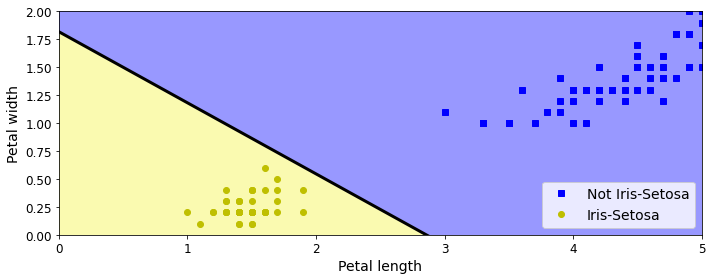

In [20]:
# 绘制分类边界
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2] # 设置坐标轴

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

你可能已经注意到 Perceptron学习算法与随机梯度下降法十分相似。事实上，Scikit-Learn的Perceptron类相当于使用具有以下超参数的SGDClassifier：
```
loss =“perceptron”，learning_rate =“constant”，eta0 = 1（学习率），penalty=None (不做正则化)。
```

请注意，与逻辑回归分类器相反，感知器不输出某个类的概率;相反，它只能根据一个固定的阈值做出预测。这也是更应该使用逻辑回归而不是感知器的一个原因。


1969年出版的名为 "感知器"名著中，Marvin Minsky and Seymour Papert强调了感知器的一些严重的缺点，特别是它们无法解决一些很微小的问题（例如，异或（XOR）分类问题;参见图10-6的左侧）。当然，这个问题在任何其他线性分类模型都一样存在（例如逻辑回归分类器），但研究人员对Perceptrons的预期更多，他们的失望也很大：因此，许多研究人员完全放弃了连接机制（*connectionism*，即神经网络的研究），而倾向与更高层次的问题，如逻辑，问题解决和搜索。


不过，事实证明，通过堆叠多个感知器可以消除感知器的一些限制。这种形式的人工神经网络就是多层感知机（MLP）。事件中，MLP可以解决异或问题，比如你可以通过计算图10-6右侧所示MLP的输出来验证一下:对于输入(0,0)或(1,1)，网络输出0，对于输入(0,1)或(1,0)，它输出1。验证发现，这个网络确实解决了异或问题!

![img](https://cdn.jsdelivr.net/gh/sadggdsa/typora-plugins-win-img@master/typora202008/14/144916-364964.png)

### 10.1.4 Multi-Layer Perceptron and Backpropagation—多层感知机和反向传播

MLP由一个（passthrough）**输入层**，一层或多层**LTU（称为隐藏层）** 和一层**LTU（称为输出层）**组成（见图10-7）。除输出层之外的每个层都包括偏置神经元并完全连接到下一层。 当ANN具有两个或更多隐藏层时，它被称为**深度神经网络**（DNN）。

![image-20200814145340177](https://cdn.jsdelivr.net/gh/sadggdsa/typora-plugins-win-img@master/typora202008/14/145822-725939.png)

信号只在一个方向流动(从输入到输出)，所以这个结构是前馈神经网络(FNN)的一个例子。

当一个人工神经网络包含一个隐藏层的深度堆叠，它就可以称为深度神经网络(DNN)。深度学习领域研究DNNs，以及更普遍的包含深度计算堆栈的模型。即便如此，只要涉及到神经网络(即使是浅层网络)，许多人就会谈论深度学习。

多年来，研究人员一直努力寻找训练MLP的方法，但是一直没有成功。但在1986年，D. E. Rumelhart发表了一篇介绍了至今仍在使用的**反向传播训练算法**的开创性文章。
简而言之,它是使用一个高效的技术自动计算梯度的梯度下降法(在第4章中介绍过):使用两个方向通过网络(一个未来,一个向后),反向传播算法能够对每一个单一的模型参数计算网络误差的梯度。换句话说，它可以找出如何调整每个连接权值和每个偏差项来达到减少误差的目的。一旦它有了这些梯度，它就会执行一个常规的梯度下降步骤，整个过程重复进行，直到网络收敛到比较良好的解。

注意： 
自动计算梯度就是自动微分法。有各种各样的自动微分法，优缺点各不相同。反向传播使用的一种被称为反向模式自动微分法。它是快速和精确的，非常适用于函数微分有很多变量(例如，连接权重)和很少的输出(例如，一个损失)的情况。如果你想了解更多关于自动微分法的信息，请查看附录D。

让我们更详细地运行一下这个算法: 
* 它一次处理一个mini-batch(例如，每个实例包含32个实例)，并且多次遍历整个训练集。每一段被称为一个epoch。
* 每一个mini-bactch被传递到网络的输入层，输入层将其发送到第一个隐藏层。然后，算法计算此层中所有神经元的输出(对mini-batch处理中的每个实例)。结果被传递到下一层，它的输出被计算并传递到下一层，以此类推，直到我们得到最后一层的输出，即输出层。这是向前传递:它非常像在进行预测，除了所有中间结果被保留，因为它们是向后传递所需要的。
* 接下来，算法测量网络的输出误差(它使用一个损耗函数来比较期望的输出和网络的实际输出，并返回一些误差的度量值)。
* 然后算法计算每个输出连接对误差的贡献大小。这是通过应用链式法则(可能是微积分中最基本的法则)来分析完成的，它使这一步快速而精确。
* 然后，算法测量有多少误差来自于下面这一层的每个连接，同样使用链式法则，向后工作，直到算法到达输入层。如前所述，通过将误差梯度向后传播到网络中，这种反向传递有效地度量网络中所有连接权重的误差梯度(这正好就是该算法的名称)。
* 最后，该算法使用它刚刚计算的误差梯度，执行一个梯度下降步骤来调整网络中所有的连接权值。

这种算法实在是非常重要,所以值得总结一遍，让我们用更简洁的语言来描述：对于每个训练实例，反向传播算法
* 首先进行预测（正向传递），测量误差，
* 然后反向遍历每一层以测量来自每个连接的误差贡献(反向方向)），
* 最后稍微调整连接权重以减少误差（Gradient Descent步骤）。

警告： 
所有隐含层连接权值必须随机初始化，否则训练将会失败。例如，如果你将所有的权值和偏差初始化为零，那么给定层中的所有神经元将完全相同，因此反向传播将以完全相同的方式影响它们，因此它们将保持相同。换句话说，尽管每层有数百个神经元，但你的模型会表现得好像每层只有一个神经元:它不会太聪明。相反，如果你随机初始化权重，你就打破了对称性，并允许反向传播训练一个不同的神经元团队。

为了使该算法正常工作，文章的作者对MLP的体系结构进行了关键的修改:他们用逻辑函数 (sigmoid)：$\sigma(z)=1 /(1+\exp(-z))$，替换了阶跃函数：这一点很重要，因为阶跃函数只包含平坦的段，所以不需要使用梯度(梯度下降不能在平坦的表面上移动)，而logistic函数处处有一个明确定义的非零导数，允许梯度下降在每一步都有一定的进展。事实上，反向传播算法不仅适用于logistic函数，还适用于其他许多激活函数。以下是另外两个受欢迎的选择:

*  双曲正切函数：tanh $(z) = 2σ(2z) – 1$
    
    就像逻辑函数一样，它是S形的，连续的和可微的，但它的输出值的范围是-1到1（在逻辑函数的情况下，而不是0到1），这倾向于使每个层的输出在训练开始时或多或少地标准化（即以0为中心）。这通常有助于加速收敛。
    
* ReLU函数：$ReLU(z)= max(0，z)$。 
    ReLU函数是连续的，但不幸的是在z = 0处是不可微的(斜率突变，导致梯度下降反弹)，对z<0的导数为0;但在实践中，它工作得非常好，而且具有计算速度快的优势，因此它已成为默认选择。最重要的是，它没有最大输出值这一事实有助于减少梯度下降过程中的一些问题(我们将在第11章中回到这个问题)。

下面的代码生成上面提到的三个激活函数和阶跃函数及它们导数如图10-8所示。

In [3]:
# 定义三个激活函数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

Saving figure activation_functions_plot


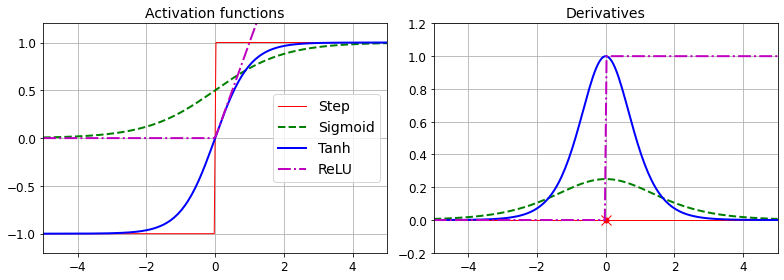

In [4]:
# 绘制四个函数和导数
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

这些流行的激活函数及其导数如图10-8所示。但是等等!为什么我们需要激活函数?如果你把几个线性变换串联起来，你得到的只是一个线性变换。例如，如果f(x) = 2x + 3和g(x) = 5x - 1，那么连接这两个线性函数会得到另一个线性函数:f(g(x)) = 2(5x 1) + 3 = 10x + 1。如果层与层之间不存在非线性，那么即使是一层很深的层也相当于一层，你不能用它来解决非常复杂的问题。反之，在理论上来讲，具有非线性激活的足够大的DNN可以近似任何连续函数。

好了!现在你知道神经网络从何而来，它们的结构是什么，以及如何计算它们的输出。你还了解了反向传播算法。但你到底能用它们做什么呢?

### 10.1.5 Regression MLP—回归多层感知机

首先，MLP可以用于回归任务。如果你想预测一个单一的价值(例如，给定房子的许多特征来预测它的价格)，那么你只需要一个输出神经元:它的输出就是预测值。对于多变量回归任务(即同时预测多个值)，你需要在每个输出维度都使用一个输出神经元。例如，要定位图像中对象的中心，需要预测2D坐标，因此需要两个输出神经元。如果还想在对象周围放置一个边框，那么还需要两个数字:对象的宽度和高度。所以，你最终有四个输出神经元。

通常，在构建用于回归的MLP时，你不希望对输出神经元使用任何激活函数，这样它们才可以自由输出任何范围的值。如果你希望保证输出总是正的，那么你可以在输出层使用ReLU激活函数。或者，你可以使用softplus激活函数，它是ReLU的一个平滑变种:

当z为负时，它接近于0，当z为正时，它接近于z。最后,如果你想保证预测将会在一个给定范围的值,那么你可以使用逻辑函数或双曲正切函数,然后将标签缩放到到适当的范围:对于逻辑函数0到1，对于双曲正切函数是-1比1。

在训练中使用的损失函数通常是均方误差，但如果在训练集中有很多异常值，你可能更喜欢使用绝对均方误差。或者，你可以使用Huber损失，该损失是两者的组合。

Tips： 
当误差小于阈值δ(通常为1)时，Huber损失是二次的，但当误差大于阈值δ时，Huber损失为线性。线性部分比均方误差对异常值的敏感性更低，而二次部分使其收敛速度更快，比均方误差更精确。

表 10-1 总结了回归MLP的典型体系结构。

![image-20200814193205011](https://cdn.jsdelivr.net/gh/sadggdsa/typora-plugins-win-img@master/typora202008/14/193720-316249.png)

### 10.1.6 Classification MLPs—分类多层感知机

MLPs还可以用于分类任务。对于二分类问题，你只需要使用单个逻辑激活函数的输出神经元:输出将是一个介于0到1之间的数字，你可以将其解释为正类的估计概率。负类的估计概率等于1减去那个数。

MLPs也可以很容易地处理多标签的二分类任务(见第3章)。例如，你可以有一个电子邮件分类系统，它可以预测每个传入的电子邮件是非垃圾邮件还是垃圾邮件，同时还可以预测它是紧急邮件还是非紧急邮件。在这种情况下，你将需要使用两个输出神经元，它们都使用逻辑激活函数:第一个神经元输出电子邮件是垃圾邮件的概率，第二个神经元输出是紧急邮件的概率。推广到更一般的情况，你将为每个正类分配一个输出神经元。注意，输出的概率加起来不一定非要等于1。这使得模型输出标签的任何组合:你可以获得非紧急火腿、紧急火腿、非紧急垃圾邮件，甚至可能有紧急垃圾邮件(尽管这可能是一个错误)。

如果每个实例只能属于一个类,在三个或更多的可能的类(例如,0到9的数字图像分类),那么对于每个类，你需要有一个输出神经元,你应该对整个输出层使用softmax激活函数(参见图9)。softmax函数(在第4章中介绍)将确保所有的估计概率都在0到1之间，并且它们加起来等于1(如果类是互斥的，这是必需的)。这种情况被称为多类分类。

![image-20200814195228867](https://cdn.jsdelivr.net/gh/sadggdsa/typora-plugins-win-img@master/typora202008/14/195234-817277.png)

关于损失函数，由于我们是在预测概率分布，交叉熵损失(也称为对数损失，见第4章)通常是一个不错的选择。

表10-2 总结了分类MLP的典型体系结构



![image-20200814195509393](https://cdn.jsdelivr.net/gh/sadggdsa/typora-plugins-win-img@master/typora202008/14/195510-118536.png)

TIP： 
在我们继续之前，我建议你在本章结束时完成练习1。你将使用各种神经网络架构并使用TensorFlow Playground来可视化它们的输出。这对于更好地理解多层感知机非常有用，包括所有超参数的影响(层数和神经元数、激活函数等等)。

现在你已经掌握了使用Keras开始实现MLPs所需的所有概念!

## 10.2 Implementing MLPs with Keras—使用Keras来实现多层感知机

Keras是一个高级的深度学习API，允许你轻松地构建、训练、评估和执行各种神经网络。它的文档(或规范)可以从https://keras.io/获得。 这个参考实现，也称为Keras，是由Francois Chollet作为一个研究项目的一部分开发的，并在2015年3月作为一个开源项目发布。由于其易用性、灵活性和漂亮的设计，它很快就受到了欢迎。为了执行神经网络所需要的大量计算，这个参考实现依赖于一个计算后端。目前，你可以从三个流行的开源深度学习库中进行选:TensorFlow、Microsoft Cognitive Toolkit (CNTK)和Theano。因此，为了避免混淆，我们将这个参考实现称为multibackend Keras。

自2016年底以来，其他实现已经发布。你现在可以在Apache MXNet、苹果的Core ML、JavaScript或TypeScript(在web浏览器中运行Keras代码)和PlaidML(它可以在各种GPU设备上运行，不仅仅是Nvidia)上运行)上运行Keras。此外，TensorFlow本身现在与它自己的Keras实现绑定在一起，tf.keras。它只支持TensorFlow作为后端，但是它的优势在于提供了一些非常有用的额外特性(参见图10-10):例如，它支持TensorFlow的Data API，这使得它可以很容易地高效地加载和预处理数据。因此，在这本书里，我们将使用tf.keras。然而，在本章中，我们不会使用任何TensorFlow特定的特性，因此代码在其他Keras实现上也能很好地运行(至少在Python中是这样)，只需要做一些微小的修改，比如更改导入。

![3](https://cdn.jsdelivr.net/gh/sadggdsa/typora-plugins-win-img@master/typora202008/14/202317-470158.png)

除了Keras和TensorFlow之外，最受欢迎的深度学习库是Facebook的PyTorch。好消息是，它的API与Keras非常相似(部分原因是这两个API都是受到Scikit-Learn和Chainer的启发)，所以一旦你了解了Keras，如果你想切换到PyTorch并不难。PyTorch的人气在2018年呈指数级增长，这在很大程度上要归功于它的简单性和出色的文档，而这并不是TensorFlow1.x的主要优势。然而，TensorFlow2可以说和PyTorch一样简单，因为它采用了Keras作为它的官方高级API，并且它的开发人员极大地简化和清理了API的其余部分。文档也被完全重新组织，现在更容易找到你需要的内容。类似地，PyTorch的主要弱点(例如，有限的可移植性和没有计算图分析)在PyTorch 1.0中得到了很大的解决。像这样健康的竞争，对每个人都有利。

好了，编码的时间到了!因为tf.keras与TensorFlow绑定在一起，让我们从安装TensorFlow开始

# 10.3 Installing TensorFlow 2—安装Tensorflow 2

假设你按照第2章中的安装说明安装了Jupyter和Scikit-Learn，那么使用pip安装TensorFlow。如果你使用virtualenv创建了一个隔离的环境，你首先需要激活它:

![image-20200814202405949](https://cdn.jsdelivr.net/gh/sadggdsa/typora-plugins-win-img@master/typora202008/14/202407-399427.png)

接下来，安装TensorFlow 2(如果你没有使用virtualenv，你需要管理员权限，或者添加——user选项):

![image-20200814202913590](https://cdn.jsdelivr.net/gh/sadggdsa/typora-plugins-win-img@master/typora202008/14/202956-404187.png)

NOTE：
为了对GPU的支持，你需要安装tensorflow- GPU而不是tensorflow，但是tensorflow团队正在致力于开发一个能够同时支持cpu和GPU系统的单一库。你仍然需要安装额外的库来支持GPU(参见https://tensorflow.org/install了解更多细节)。我们将在第19章更深入地了解gpu。

要测试安装，请打开Python shell或Jupyter笔记本，然后导入TensorFlow和tf.keras和打印他们的版本:

In [5]:
# 导入TensorFlow和tf。keras
import tensorflow as tf 
from tensorflow import keras

In [6]:
# 打印他们的版本
tf.__version__

'2.0.0'

In [7]:
keras.__version__

'2.2.4-tf'

第二个版本是tf.keras实现的Keras API版本。注意，它以-tf结尾，强调了tf.keras实现了keras API，以及一些额外的特定tensorflow的特性。 

现在让我们使用tf.keras!我们将从构建一个简单的图像分类器开始。

# 10.4 Building an Image Classifier Using the Sequential API—使用序列API构建图像分类器

首先，我们需要加载一个数据集。在这一章里,我们将解决Fashion MNIST,该数据集是MNIST的一个替代(第三章中引入)。它有相同的格式MNIST(70000×28像素的灰度图像,与10类),但这些图片代表的是时尚物品，而不是手写的数字，所以每一种分类都更加多样化，并且这个问题也比MNIST的挑战大得多。例如，一个简单的线性模型在MNIST上可以达到92%的准确率，但是在Fashion MNIST上只能达到83%。

## 10.4.1 Using Keras to load the dataset—使用Keras来加载数据集

Keras提供了一些实用函数来获取和加载常见的数据集，包括MNIST、Fashion MNIST和我们在第2章中使用的California housing数据集。现在让我们载入Fashion MNIST:

In [8]:
# 加载数据集
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

当使用Keras而不是Scikiti - learn加载MNIST或Fashion MNIST时，一个重要的区别是每张图片都是28×28的数组，而不是大小为784的一维数组。此外，像素强度被表示为整数(从0到255)而不是浮点数(从0.0到255.0)。让我们看看训练集的形状和数据类型:

In [9]:
# 训练集的形状
X_train_full.shape

(60000, 28, 28)

In [10]:
# 训练集的数据类型
X_train_full.dtype

dtype('uint8')

注意，数据集已经被分割成一个训练集和一个测试集，但是没有验证集，所以我们现在将创建一个验证集。此外，由于我们要使用梯度下降来训练神经网络，我们必须缩放输入特征。为了简单起见，我们将像素强度按比例除以255.0(这也将它们转换为浮点数)，缩小到0-1范围:

In [11]:
# 创造验证集
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

对于MNIST，当标签等于5时，这意味着图像表示手写数字5。一件容易的事。然而，对于Fashion MNIST，我们需要类名的列表来知道我们在处理什么:

你可以使用Matplotlib的imshow()函数，使用“二进制”颜色映射来绘制图像:

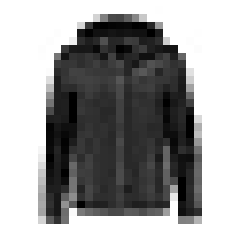

In [12]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

图10-11展示了来自Fashion MNIST数据集的一些示例。

标签是类id(表示为uint8)，从0到9:

In [16]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

对应的类名如下

In [22]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

所以训练集中的第一张图像是一件外套:

In [23]:
class_names[y_train[0]]

'Coat'

验证集包含5,000张图片，测试集包含10,000张图片

In [24]:
X_valid.shape

(5000, 28, 28)

In [25]:
X_test.shape

(10000, 28, 28)

让我们看一看数据集中的图像样本:让我们看一看数据集中的图像样本:

Saving figure fashion_mnist_plot


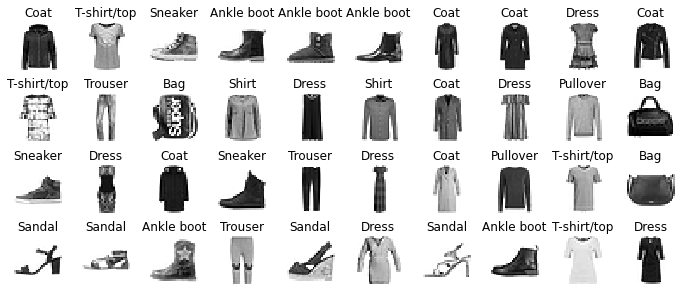

In [26]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

### 10.4.2 Creating the model using the Sequential API—使用顺序API创建模型

现在让我们构建神经网络!这是一个有两个隐藏层的分类MLP:

In [27]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

让我们逐行检查这段代码:
* 第一行创建了一个顺序模型。这是神经网络中最简单的Keras模型，该神经网络仅由顺序连接的单层堆栈组成。这被称为顺序API。

* 接下来，我们构建第一个层并将其添加到模型中。它是一个展开层，其作用是将每个输入图像转换为一维数组:如果它接收到输入数据X，它使用X.reshape(-1, 1)，来变换矩阵。该层没有任何参数;它只是在那里做一些简单的预处理。因为它是模型中的第一层，所以应该指定input_shape，它不包括批大小，而只包括实例的形状。或者，你可以添加一个keras.layers.InputLayer作为第一层，设置input_shape=[28,28]。

* 接下来，我们添加一个包含300个神经元的稠密的隐藏层。它将使用ReLU激活函数。每一个稠密层可以管理自己的权值矩阵，其中包含神经元与其输入之间的所有连接权重。它还管理一个偏差项(每个神经元一个)。当它接收到一些输入数据时，它使用公式10-2进行计算。

* 然后，我们添加了第二个稠密的隐藏层，包含100个神经元，同样使用ReLU激活函数。

* 最后，我们使用softmax激活函数(因为类是排他的)，添加一个有10个神经元(每个类一个)的稠密输出层。

TIP:   
指定activation="relu"等同于指定activation=keras.activation .relu。在keras.activations package中还有其他激活函数。我们将在这本书中使用其中的许多函数。完整列表见https://keras.io/activations/。

不像我们刚才那样一个一个地添加网络层，你可以在创建顺序模型时传递一个层列表:

In [28]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [29]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [30]:
# 展示模型的层
model.layers 

model.summary()方法可以显示所有model的层，包括每个层的名称(它是自动生成的，除非你在创建层时设置它)、它的输出形状(None表示批大小可以是任何东西)和它的参数数量。Summary最后给出了参数的总数，包括可训练的和不可训练的参数。在这里，我们只有可训练参数(我们将在第11章中看到不可训练参数的例子)

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


请注意，密集的层通常有很多参数。例如，第一隐层有784×300的连接权值，加上300个偏置项，总计235,500个参数!这给了模型相当大的灵活性来拟合训练数据，但这也意味着模型有过拟合的风险，特别是当你没有很多训练数据的时候。我们稍后会回到这个问题。

你可以很容易地获取一个模型的层列表，通过它的索引获取一个层，或者你可以通过名称获取它:

In [32]:
# 获得模型隐藏层的名字
hidden1 = model.layers[1]
hidden1.name

'dense'

In [33]:
model.get_layer(hidden1.name) is hidden1

True

层的所有参数都可以使用它的get_weights()和set_weights()方法访问。对于稠密层，这包括连接权值和偏置项:

In [34]:
# 获得隐藏层的权重和偏差
weights, biases = hidden1.get_weights()

In [35]:
# 打印权重
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [36]:
# 权重矩阵的形状
weights.shape

(784, 300)

In [37]:
# 打印偏差
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [38]:
# 打印偏差的形状
biases.shape

(300,)

请注意，稠密层随机初始化了连接权值(正如我们前面讨论的那样，这是打破对称性所需要的)，而偏差被初始化为零，这对我们是一件好事。如果希望使用不同的初始化方法，可以在创建层时设置kernel_initializer (kernel是连接权重矩阵的另一个名称)或bias_initializer。我们将在第11章中进一步讨论初始化器，但如果你想要完整的列表，请参见https://keras.io/initializers

注意： 
权重矩阵的形状取决于输入的数量。这就是为什么建议在顺序模型中创建第一层时指定input_shape的原因。但是，如果你不指定输入形状，那也没关系:Keras只会等待，直到它知道输入的形状，然后才真正地构建模型。当你向它提供实际数据时(例如，在训练期间)，或者当你调用它的build()方法时，就会发生这种情况。在真正构建模型之前，这些层将没有任何权重，并且你将无法执行某些操作(例如打印模型摘要或保存模型)。因此，如果你在创建模型时知道输入形状，那么最好指定它。

### 10.4.3 Compiling the model—编译模型

在创建模型之后，你必须调用它的compile()方法来指定要使用的loss函数和优化器。可选地，你可以指定在训练和评估期间要计算的额外指标列表:

In [39]:
# 自定义模型指定要使用的loss函数和优化器
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

NOTE：  
使用loss="sparse_categorical_crossentropy"等同于使用loss=keras.loss .sparse_categorical_crossentropy。类似地，指定optimizer="sgd"等同于指定optimizer = keras.optimizers.SGD()，而metrics=["accuracy"]等同于metrics=[keras.metrics.sparse_categorical_accuracy]。我们将在这本书中使用许多其他的损失，优化器和指标;有关完整的列表，请参见https://keras.io/losses,https://keras.io/optimizers,https://keras.io/metrics。

这段代码需要一些解释。首先，我们使用“sparse_categorical_crossentropy”作为损失函数，因为我们有稀疏标签(即对于每个实例，只有一个目标类索引，在本例中是从0到9)，并且类是互斥的。如果我们对每个实例每个类都有一个目标概率(比如一个one-hot向量，比如one-hot向量使用[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]来表示类3)，那么我们需要使用“categorical_crossentropy”作为替代的损失函数。如果我们要进行二进制分类(使用一个或多个二进制标签)，那么我们将在输出层中使用“sigmoid”激活函数，而不是“softmax”激活函数，并且我们将使用“binary_crossentropy”损失函数。

TIP：  
如果你想转换稀疏标签(比如类别标签）到one-hot向量标签时，你可以使用keras.util .to_categorical()函数。反过来，你需要使用axis=1的np.argmax()函数。

对于优化器，“sgd”意味着我们将使用简单的随机梯度下降来训练模型。换句话说，Keras将执行前面描述的反向传播算法（反向模式自动微分法加上梯度下降法)。我们将在第11章讨论更有效的优化器(它们改进梯度下降部分，而不是自动微分)。

NOTE：在使用SGD优化器时，调整学习率是很重要的。因此，你通常希望使用optimizer=keras. optimizs.sgd (lr=??)来设置学习率，而不是optimizer="sgd"，而它的学习率默认值是lr=0.01。

最后，因为这个模型是一个分类器，所以在训练和评估时测量它的“准确性”是非常有用的。

### 10.4.4 Training and evaluating the model—训练和评估模型

现在我们已经准备好了模型，可以进行训练了。现在我们只需调用它的fit()方法:

In [40]:
# 训练模型
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 3s 56us/sample - loss: 0.7228 - accuracy: 0.7622 - val_loss: 0.5310 - val_accuracy: 0.8148
Epoch 2/30
55000/55000 [==============================] - 3s 55us/sample - loss: 0.4839 - accuracy: 0.8320 - val_loss: 0.4491 - val_accuracy: 0.8452
Epoch 3/30
55000/55000 [==============================] - 3s 52us/sample - loss: 0.4380 - accuracy: 0.8470 - val_loss: 0.4177 - val_accuracy: 0.8556
Epoch 4/30
55000/55000 [==============================] - 3s 53us/sample - loss: 0.4128 - accuracy: 0.8557 - val_loss: 0.3904 - val_accuracy: 0.8656
Epoch 5/30
55000/55000 [==============================] - 3s 52us/sample - loss: 0.3929 - accuracy: 0.8625 - val_loss: 0.3985 - val_accuracy: 0.8612
Epoch 6/30
55000/55000 [==============================] - 3s 52us/sample - loss: 0.3776 - accuracy: 0.8672 - val_loss: 0.3731 - val_accuracy: 0.8740
Epoch 7/30
55000/55000 [==============================] -

我们向模型传递输入特征(X_train)和目标类(y_train)，以及要训练的epoch数量(否则默认为1，dang'ran这肯定不足以收敛到一个好的解决方案)。我们还会向模型传递一个验证集(这是可选的)。Keras将在每个epoch结束时，会在这个集合上测量损失和额外的指标，这样地做法对于查看模型的实际表现是非常有用的。如果模型，训练集上的性能表现比在验证集上好得多，那么你的模型很可能是过度拟合了训练集(或者在模型中存在bug，比如训练集和验证集的数据不匹配)

在前面的内容中，神经网络已经被训练了。在训练中的每个epoch中,Keras显示实例的处理数量(以及一个进度条)，还有每个样本在训练集和验证集上的平均训练时间和损失和准确性(或者是任何其他额外的指标要求)。你可以看到训练损失在下降,这是一个好的迹象,在30个epoch后，验证准确度达到89.26%。这和训练的准确度相差不大，所以似乎没有太多的过度拟合。

TIP：  
不使用validation_data参数来传递验证集，你可以将validation_split设置为你希望Keras用于验证的训练集的比率。例如，validation_split=0.1告诉Keras使用数据的最后10%(在打乱之前)来进行验证。

如果训练集非常扭曲,有些类有过多的实例，但是其他的类实例太少,当调用fit()方法时设置class_weight参数将是非常有用的,这将给实例较少的的类一个更大的权重和实例过多的类一个较低的权重。这些权重将被Keras在计算损失时使用。  
如果需要为每个实例设置权重，请设置sample_weight参数(这个参数将取代class_weight)。如果一些实例是由专家标记的，而其他实例是通过众包平台标记的，那么Per-instance权重可能会有用:因为你可能想要给前者更多的权重。你还可以为验证集提供sample weights(但不是类权重)，通过将它们作为validation_data元组中的第三项添加。

fit()方法返回一个包含训练参数的历史对象(History .params)：

In [41]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

模型训练时的epoch列表 (history.epoch)：

In [42]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


还有一个最重要的字典(history.history)，这个字典包含它在训练集和验证集(如果有的话)的每个epoch结束时测量的损失和额外度量参数。

In [43]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

如果你使用这个字典来创建一个pandas DataFrame并调用它的plot()方法，你可以得到如图10-12所示的学习曲线:

Saving figure keras_learning_curves_plot


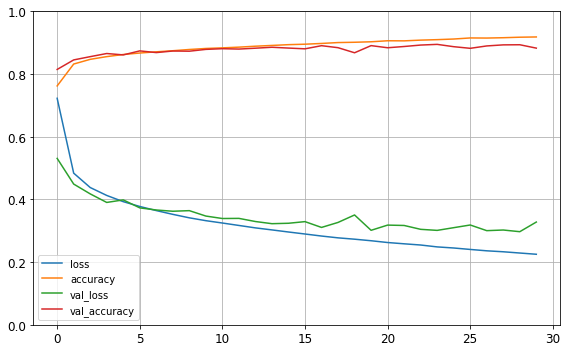

In [44]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

可以看到，在训练过程中，训练精度和验证精度都在稳步上升，而训练损失和验证损失却在下降。这是一个好现象!此外，验证曲线与训练曲线比较接近，说明过拟合程度不高。在这个特殊的例子中，在训练开始时，模型在验证集上的表现似乎比在训练集上的表现更好。但事实并非如此:事实上，验证错误是在每个epoch结束时计算的，而训练错误是在每个epoch期间使用运行平均值计算的。所以训练曲线应该向左平移半个epoch。如果这样做，你会看到训练和验证曲线在训练开始时几乎完美地重叠。

TIP：  
在绘制训练曲线时，应该把它向左移动半个epoch。

训练集的性能最终会超过验证性能，当然这通常是在训练时间足够长时的情况。你可以看出模型还没有完全收敛，因为验证损失仍在下降，所以你应该继续进行训练。这就像再次调用fit()方法一样简单，因为Keras只是在它停止的地方继续进行训练(你应该能够达到接近89%的验证精度)。

如果你对模型的性能不满意，你么应该掉回去，并调优超参数。首先要检查的是学习率。如果这没有帮助，尝试修改另一个优化器(并且在改变任何超参数后都要重新调整学习速率)。如果性能仍然不太好，那么你需要尝试调整模型超参数，例如层的数量、每层的神经元数量以及每个隐藏层使用的激活函数的类型。你还可以尝试调优其他超参数，比如批处理大小(可以在fit()方法中使用batch_size参数设置，该参数默认值为32)。我们将在本章结束时会回到超参数调优。如果你对模型的验证准确性感到满意，那么你应该在将模型部署到生产环境之前，在测试集中对其进行评估来估计泛化误差。你可以使用evaluate()方法轻松地完成这个任务(它还支持其他几个参数，比如batch_size和sample_weight;更多细节请参阅文件):

In [45]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.36408724300861356, 0.869]

正如我们在chapter2中看到的,这种情况是常见地（测试集的性能略低于设置的验证集）,因为hyperparameters使用验证集进行调整,而不是测试集(然而,在这个例子中,我们没有做任何hyperparameter的调优,所以低精度是坏运气)。记住要抵制在测试集上调整超参数的诱惑，否则你对泛化误差的估计将过于乐观。

### 10.4.5 Using the model to make predictions—使用模型进行预测

接下来，我们可以使用模型的predict()方法对新实例进行预测。因为我们没有事实上的的新实例，所以我们只使用测试集的前三个实例:

In [46]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

正如你看到的那样，对于每个实例，模型对每个类（从类0到类9）估计一个概率。例如，对于第一张图片，模型估计9类(踝靴)的概率为98%，5类(凉鞋)的概率为1%，7类(运动鞋)的概率为1%，而其他类别的概率可以忽略不计。换句话说，模型认为第一张图片是鞋子，最有可能是短靴，但也有可能是凉鞋或运动鞋。如果你只关心估计概率最高的类(即使该概率非常低)，那么你可以可以使用predict_classes()方法作为代替：

In [47]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [48]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

在这里，分类器对这三幅图像进行了正确的分类(如图10-13所示):

In [49]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Saving figure fashion_mnist_images_plot


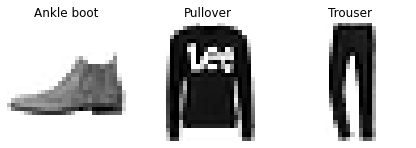

In [50]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

现在你知道了如何使用顺序API来构建、训练、评估和使用分类MLP。那么回归MLP会怎么样呢?

## 10.5 Building a Regression MLP Using the Sequential API—使用顺序API构建回归多层感知机

现在让我们回到加州的住房问题，并使用回归神经网络来解决它。为了更简单的处理办法，我们将使用Scikit-Learn的fetch_california_housing()函数来加载数据。这个数据集比我们在第2章中使用的数据集更简单，因为它只包含数值特征(没有ocean_proximity特征)，并且没有缺失值。加载数据集后，我们将其分成训练集、验证集和测试集，并且对所有特征进行缩放:

In [51]:
# 导入库
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# 获得数据
housing = fetch_california_housing()
# 将数据集分为训练集，验证集，测试集
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)
# 对特征进行缩放
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

使用顺序API来构建、训练、评估，并使用回归MLP来进行预测，这与我们对分类MLP所做的非常类似。主要的区别是输出层只有一个神经元(因为我们只想预测一个值)，而且我们没有使用激活函数，使用损失函数是均方误差。因为数据集噪声比较大，我们只使用一个比之前神经元少的隐藏层，以避免过拟合:

In [52]:
np.random.seed(42)
tf.random.set_seed(42)

In [53]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 48us/sample - loss: 1.6321 - val_loss: 1.5903
Epoch 2/20
11610/11610 [==============================] - 0s 33us/sample - loss: 0.7124 - val_loss: 0.6539
Epoch 3/20
11610/11610 [==============================] - 0s 33us/sample - loss: 0.6348 - val_loss: 0.6039
Epoch 4/20
11610/11610 [==============================] - 0s 33us/sample - loss: 0.5983 - val_loss: 0.5738
Epoch 5/20
11610/11610 [==============================] - 0s 33us/sample - loss: 0.5713 - val_loss: 0.5406
Epoch 6/20
11610/11610 [==============================] - 0s 33us/sample - loss: 0.5482 - val_loss: 0.5221
Epoch 7/20
11610/11610 [==============================] - 0s 33us/sample - loss: 0.5298 - val_loss: 0.4965
Epoch 8/20
11610/11610 [==============================] - 0s 33us/sample - loss: 0.5138 - val_loss: 0.4843
Epoch 9/20
11610/11610 [==============================] - 0s 32us/sample - loss: 0.5005 - val_l

In [54]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

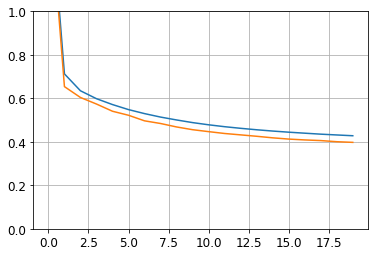

In [55]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

正如你所看见的，Sequential API非常容易使用。然而，尽管顺序模型十分常见，但是有些情况下，构建具有更复杂拓扑或具有多个输入或输出的神经网络是有用的。为此，Keras提供了 Functional API。

## 10.6 Building Complex Models Using the Functional API—使用Functional API构建复杂模型

非顺序神经网络的一个例子是Wide & Deep神经网络。Cheng Heng-Tze等人在2016年的一篇论文中介绍了这种神经网络的结构，这种神经网络将全部或部分输入直接连接到输出层，如图10-14所示。这种体系结构使得神经网络能够学习深模式(使用深路径)和简单规则(通过短路径)。与之相反，一个常规MLP强制所有数据流经完整的层栈;因此，数据中的简单模式最终可能会被这个转换序列所扭曲

![image-20200815145503625](https://cdn.jsdelivr.net/gh/sadggdsa/typora-plugins-win-img@master/typora202008/15/145701-750216.png)

In [56]:
# 预设随机种子
np.random.seed(42)
tf.random.set_seed(42)

现在让我们构建这样一个神经网络来解决加州的住房问题:

In [57]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

让我们遍历这段代码的每一行:
* 首先，我们需要创建一个输入对象。这个输入对象是模型将获得的输入类型的规范，包括它的形状和dtype。我们很快就会看到，一个模型实际上可能有多个输入。

* 接下来，我们使用ReLU激活函数创建一个包含30个神经元的稠密层。一旦它被创建，请注意，我们会像调用函数一样调用它，将输入传递给它。这就是为什么它被称为函数API。请注意，我们只是告诉Keras应该如何将各层连接在一起;但是目前还没有处理实际数据。

* 然后我们创建第二个隐藏层，并再次使用它作为一个函数。注意，我们会将第一个隐藏层的输出传递给它。

* 接下来，我们创建一个连接层，并且再次将其作为函数使用，以连接第二层隐藏层的输入和输出。你可能会更喜欢使用scala .layers. Concatenate()函数，该函数会创建一个连接层，并立即使用给定的输入调用该层。

* 然后我们创建输出层，其中只有一个神经元，没有激活函数，我们像调用函数一样调用它，将连接的结果传递给它。

* 最后，我们创建一个Keras模型，指定使用哪些输入和输出。

一旦你构建了Keras模型，一切就与前面完全一样了，因此不需要在这里重复:那就是你必须编译模型、训练它、评估它，并使用它来进行预测。

使用summary方法，显示所有model的层，包括每个层的名称。

In [58]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_6[0][0]                

对模型进行编译，训练

In [61]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 53us/sample - loss: 1.2474 - val_loss: 0.8727
Epoch 2/20
11610/11610 [==============================] - 0s 36us/sample - loss: 0.6341 - val_loss: 0.8881
Epoch 3/20
11610/11610 [==============================] - 0s 36us/sample - loss: 0.5885 - val_loss: 0.5573
Epoch 4/20
11610/11610 [==============================] - 0s 36us/sample - loss: 0.5599 - val_loss: 0.5238
Epoch 5/20
11610/11610 [==============================] - 0s 36us/sample - loss: 0.5367 - val_loss: 0.6201
Epoch 6/20
11610/11610 [==============================] - 0s 36us/sample - loss: 0.5170 - val_loss: 0.4979
Epoch 7/20
11610/11610 [==============================] - 0s 34us/sample - loss: 0.5022 - val_loss: 0.5240
Epoch 8/20
11610/11610 [==============================] - 0s 35us/sample - loss: 0.4885 - val_loss: 0.4538
Epoch 9/20
11610/11610 [==============================] - 0s 35us/sample - loss: 0.4778 - val_l

对模型进行评估和预测

In [62]:
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

但是，如果你通过宽路径发送特征的子集，而通过深路径发送不同的子集(可能重叠)(参见图10-15)呢?在这种情况下，一种解决方案是使用多个输入。例如，假设我们想通过宽路径发送5个特征(特征0到4)，通过深路径发送6个特征(特征2到7):

![image-20200815150943220](https://cdn.jsdelivr.net/gh/sadggdsa/typora-plugins-win-img@master/typora202008/15/150943-464957.png)

你至少需要命名最重要的层，特别是当模型像这样有点复杂的时候。请注意，我们在创建模型时指定了input =[input_A, input_B]。现在我们可以像往常一样编译模型。但是当我们调用fit()方法时，我们必须传递一对矩阵(X_train_A, X_train_B):每个输入设置一个矩阵，而不是传递单个输入矩阵（X_train，X_valid）。当你调用evaluate()或predict()时，这样的设置同样适用于X_test和X_new:

In [63]:
# 预设随机种子
np.random.seed(42)
tf.random.set_seed(42)

现在我们来构建网络：

In [64]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [65]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 55us/sample - loss: 1.8095 - val_loss: 1.4409
Epoch 2/20
11610/11610 [==============================] - 0s 37us/sample - loss: 0.6798 - val_loss: 0.6123
Epoch 3/20
11610/11610 [==============================] - 0s 39us/sample - loss: 0.5957 - val_loss: 0.5618
Epoch 4/20
11610/11610 [==============================] - 0s 37us/sample - loss: 0.5580 - val_loss: 0.5514
Epoch 5/20
11610/11610 [==============================] - 0s 37us/sample - loss: 0.5331 - val_loss: 0.5073
Epoch 6/20
11610/11610 [==============================] - 0s 37us/sample - loss: 0.5124 - val_loss: 0.4860
Epoch 7/20
11610/11610 [==============================] - 0s 37us/sample - loss: 0.4972 - val_loss: 0.4631
Epoch 8/20
11610/11610 [==============================] - 0s 37us/sample - loss: 0.4834 - val_loss: 0.4514
Epoch 9/20
11610/11610 [==============================] - 0s 37us/sample - loss: 0.4746 - val_l

对模型进行评估和预测

In [66]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

在许多情况下，你可能会希望有多个输出:

* 任务可能需要它。例如，你可能想要定位和分类图片中的主要对象。这既是一个回归任务(查找对象中心的坐标，以及它的宽度和高度)，也是一个分类任务。

* 类似地，你可能有基于相同数据的多个独立任务。当然，你可以为每个任务都单独训练一个神经网络，但在很多情况下，通过训练单个神经网络，每个任务都有一个输出，你会在所有任务上得到更好的结果。这是因为神经网络可以学习数据中对跨任务有用的特征。例如，你可以对人脸图片进行多任务分类，使用一个输出对人的面部表情(微笑、惊讶等)进行分类，再使用另一个输出来识别他们是否戴眼镜。

* 另一个用例是作为正则化技术(比如一个目标是减少过拟合从而提高模型的泛化能力训练约束)。例如，你可能希望在神经网络体系结构中添加一些辅助输出(参见图10-16)，以确保网络的底层部分自己学习一些有用的东西，而不依赖于网络的其他部分。

![image-20200815153804542](https://cdn.jsdelivr.net/gh/sadggdsa/typora-plugins-win-img@master/typora202008/15/153804-821061.png)

添加额外的输出非常简单:只需将它们连接到适当的层，并将它们添加到模型的输出列表中。例如，下面的代码构建了图10-16所示的网络:

In [67]:
# 预设随机种子
np.random.seed(42)
tf.random.set_seed(42)

In [68]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

每个输出都需要有自己的损失函数。因此，当我们编译模型时，我们应该传递一个损失列表(如果我们传递一个单独的损失，Keras将假设所有输出必须使用这个相同的损失)。默认情况下，Keras将计算所有这些损失，并简单地将它们相加，得到用于训练的最终损失。我们更关心的是主输出而不是辅助输出(因为它只是用于正则化)，所以我们想给主输出的损失一个更大的权重。幸运的是，在编译模型时可以设置所有的损失权重：

In [69]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

现在，当我们训练模型时，我们需要为每个输出提供标签。在这个示例中，主输出和辅助输出应该尝试预测相同的东西，因此它们应该使用相同的标签。所以不是传递y_train，而是传递(y_train, y_train) (y_valid和y_test也是一样)

In [70]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 77us/sample - loss: 2.1329 - main_output_loss: 1.9166 - aux_output_loss: 4.0719 - val_loss: 2.2885 - val_main_output_loss: 1.5657 - val_aux_output_loss: 8.7861
Epoch 2/20
11610/11610 [==============================] - 0s 41us/sample - loss: 0.8910 - main_output_loss: 0.6989 - aux_output_loss: 2.6202 - val_loss: 1.4258 - val_main_output_loss: 0.6285 - val_aux_output_loss: 8.5972
Epoch 3/20
11610/11610 [==============================] - 0s 40us/sample - loss: 0.7397 - main_output_loss: 0.6064 - aux_output_loss: 1.9374 - val_loss: 1.3894 - val_main_output_loss: 0.5941 - val_aux_output_loss: 8.5417
Epoch 4/20
11610/11610 [==============================] - 0s 40us/sample - loss: 0.6746 - main_output_loss: 0.5684 - aux_output_loss: 1.6301 - val_loss: 1.3275 - val_main_output_loss: 0.6028 - val_aux_output_loss: 7.8451
Epoch 5/20
11610/11610 [==============================] - 0s 41us/s

当我们评估模型时，Keras将返回全部损失，以及所有的个体损失:

In [71]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

类似地，predict()方法将为每个输出返回预测:

In [72]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

如你所见，你可以很容易地使用Functional API构建任何类型的架构。让我们看看构建Keras模型的最后一种方法。

## 10.7 Using the Subclassing API to Build Dynamic Models—使用子类化API构建动态模型

顺序API和Functional API都是声明性的:首先，你声明希望使用哪些层以及它们应该如何连接，然后才能开始为模型提供一些数据用于训练或推理。这样做有很多优点:
* 模型可以很容易地保存、克隆和共享;

* 它的结构可以显示和分析;框架可以推断形状和检查类型，因此可以及时地捕获错误。

* 因为整个模型是一个静态的层图，它也很容易调试。但另一方面，它是静态的。一些模型包括循环、变化形状、条件分支和其他动态行为。对于这种情况，或者如果你喜欢一种更命令式的编程风格，那么子类化API就比较适合你。

子类化API只需要子类化Model类，在构造函数中创建需要的层，并使用它们来执行在call()方法中需要的计算。例如，创建以下WideAndDeepModel类的实例，我们可以获得一个与我们刚刚用Functional API构建的模型等价的模型。然后，你可以编译它，评估它，并使用它来进行预测，就像我们刚才所做的那样：

In [73]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

这个例子看起来很像Functional API，除了我们不需要创建输入;我们只对输入参数使用call()方法，并且我们将构造函数中层的创建与在call()方法中的使用分离开来。最大的区别是，你可以在call()方法中做几乎任何你想做的事情:for循环、if语句、底层TensorFlow操作—你的想象力是有限的(参见第12章)!这使它成为一个为研究人员试验新想法的伟大的API。

对模型进行训练

In [74]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 79us/sample - loss: 2.2968 - output_1_loss: 2.1826 - output_2_loss: 3.3166 - val_loss: 3.0093 - val_output_1_loss: 1.5519 - val_output_2_loss: 16.1139
Epoch 2/10
11610/11610 [==============================] - 0s 41us/sample - loss: 0.9760 - output_1_loss: 0.8529 - output_2_loss: 2.0834 - val_loss: 1.9290 - val_output_1_loss: 0.7524 - val_output_2_loss: 12.5119
Epoch 3/10
11610/11610 [==============================] - 0s 41us/sample - loss: 0.8288 - output_1_loss: 0.7270 - output_2_loss: 1.7431 - val_loss: 1.6768 - val_output_1_loss: 0.7256 - val_output_2_loss: 10.2305
Epoch 4/10
11610/11610 [==============================] - 0s 39us/sample - loss: 0.7637 - output_1_loss: 0.6744 - output_2_loss: 1.5665 - val_loss: 1.4544 - val_output_1_loss: 0.6860 - val_output_2_loss: 8.3638
Epoch 5/10
11610/11610 [==============================] - 0s 40us/sample - loss: 0.7227 - output_1_loss:

这种额外的灵活性是有代价的:你的模型的架构是隐藏在call()方法中的，所以Keras不能轻松地检查它;Keras不能保存或克隆它;当你调用summary()方法时，你只能得到一个层的列表，而没有关于它们如何相互连接的任何信息。此外,Keras不能提前检查类型和形状，因此更容易出错。所以，除非你真的需要额外的灵活性，否则你应该坚持使用顺序API或函数API。

TIP：  
Keras模型可以像常规层一样使用，因此你可以轻松地将它们组合起来构建复杂的体系结构。

既然现在你知道了如何使用Keras构建和训练神经网络，那么你会希望保存它们！

## 10.8 Saving and Restoring a Model—保存和恢复模型

当使用顺序API或函数API时，保存训练好的Keras模型非常简单:

In [75]:
# 预设随机种子
np.random.seed(42)
tf.random.set_seed(42)

In [76]:
# 设计顺序API
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [77]:
# 对模型进行训练
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 52us/sample - loss: 1.8631 - val_loss: 3.2403
Epoch 2/10
11610/11610 [==============================] - 0s 36us/sample - loss: 0.6723 - val_loss: 0.6939
Epoch 3/10
11610/11610 [==============================] - 0s 36us/sample - loss: 0.5927 - val_loss: 0.5531
Epoch 4/10
11610/11610 [==============================] - 0s 35us/sample - loss: 0.5550 - val_loss: 0.5519
Epoch 5/10
11610/11610 [==============================] - 0s 35us/sample - loss: 0.5278 - val_loss: 0.5715
Epoch 6/10
11610/11610 [==============================] - 0s 36us/sample - loss: 0.5032 - val_loss: 0.5591
Epoch 7/10
11610/11610 [==============================] - 0s 36us/sample - loss: 0.4863 - val_loss: 0.4593
Epoch 8/10
11610/11610 [==============================] - 0s 37us/sample - loss: 0.4701 - val_loss: 0.4651
Epoch 9/10
11610/11610 [==============================] - 0s 35us/sample - loss: 0.4586 - val_l

In [78]:
# 保存模型
model.save("my_keras_model.h5")

Keras将使用HDF5格式来保存模型的架构(包括每一层的超参数)和每一层的所有模型参数的值(例如连接权重和偏差)。它还可以保存优化器(包括它的超参数和它可能有的状态)。

你通常会有一个脚本用来训练模型并保存，以及一个或多个加载模型并使用它进行预测的脚本(或web服务)。
就像使用下面的这行代码，加载模型十分容易:

In [79]:
model = keras.models.load_model("my_keras_model.h5")

使用模型进行预测：

In [80]:
model.predict(X_new)

array([[0.54909724],
       [1.6584849 ],
       [3.0271604 ]], dtype=float32)

但是如果训练持续了几个小时呢?这是很常见的，特别是在训练大型数据集时。在这种情况下，你不仅应该在训练结束时保存模型，还要在训练期间定期保留checkpoints，，以避免在计算机崩溃时丢失所有东西。但是如何让fit()方法保存checkpoints呢?使用回调函数。

### 10.8.1 Using Callbacks—使用回调函数

fit()方法接受一个callbacks（回调函数）参数，该参数允许你指定一个对象列表，Keras将在训练的开始和结束、每个epoch的开始和结束、甚至在处理每个批处理之前和之后调用这个列表。例如，ModelCheckpoint callback会在训练期间定期保存模型的checkpoint，默认情况下是在每个epoch结束的时候：

In [81]:
# 预设随机种子
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [82]:
# 设计神经网络
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])  

In [83]:
# 编译模型
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

此外，如果你在训练期间使用验证集，你可以在创建ModelCheckpoint时设置save_best_only=True。在这种情况下，它只会在模型在验证集上的性能达到最佳时保存模型。这种方式,你不需要担心训练时间太长和对训练集过度拟合:此外，如果你在训练期间使用验证集，你可以在创建ModelCheckpoint时设置save_best_only=True。在这种情况下，只有模型在验证集上的性能达到最佳时会保存模型。这种方式,你不需要担心培训太久和过度拟合训练集:在训练后简单地恢复过去保存的模型,你就会获得最好的模型验证集。下面的代码是一个简单的方法来实现早期停止(在第4章介绍过):

In [84]:
# 使用callbacks方法保存checkpoint，设置save_best_only=True
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

In [85]:
# 训练模型，并且使用callbacks
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 61us/sample - loss: 1.8631 - val_loss: 3.2403
Epoch 2/10
11610/11610 [==============================] - 1s 49us/sample - loss: 0.6723 - val_loss: 0.6939
Epoch 3/10
11610/11610 [==============================] - 1s 46us/sample - loss: 0.5927 - val_loss: 0.5531
Epoch 4/10
11610/11610 [==============================] - 0s 37us/sample - loss: 0.5550 - val_loss: 0.5519
Epoch 5/10
11610/11610 [==============================] - 0s 36us/sample - loss: 0.5278 - val_loss: 0.5715
Epoch 6/10
11610/11610 [==============================] - 0s 36us/sample - loss: 0.5032 - val_loss: 0.5591
Epoch 7/10
11610/11610 [==============================] - 0s 35us/sample - loss: 0.4863 - val_loss: 0.4593
Epoch 8/10
11610/11610 [==============================] - 0s 36us/sample - loss: 0.4701 - val_loss: 0.4651
Epoch 9/10
11610/11610 [==============================] - 0s 35us/sample - loss: 0.4586 - val_l

In [86]:
# 回复到最佳模型
model = keras.models.load_model("my_keras_model.h5")

另一种实现早期停止的方法是简单地使用earlystop callbacks。如果一定数量的epoch(由patience参数定义)后，在验证集上的测量没有进展时，模型将回中断训练，并且可以选择回滚到最佳模型。你可以结合这两种回调来节省你的模型的检查点(以防你的电脑崩溃)，并在没有更多进展的时候中断训练(避免浪费时间和资源):

In [88]:
# 模型编译
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
# callback设置
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
# 模型训练                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 52us/sample - loss: 0.4388 - val_loss: 0.4122
Epoch 2/100
11610/11610 [==============================] - 0s 36us/sample - loss: 0.4319 - val_loss: 0.4046
Epoch 3/100
11610/11610 [==============================] - 0s 35us/sample - loss: 0.4256 - val_loss: 0.4065
Epoch 4/100
11610/11610 [==============================] - 0s 37us/sample - loss: 0.4202 - val_loss: 0.3998
Epoch 5/100
11610/11610 [==============================] - 0s 36us/sample - loss: 0.4157 - val_loss: 0.3970
Epoch 6/100
11610/11610 [==============================] - 0s 37us/sample - loss: 0.4112 - val_loss: 0.3964
Epoch 7/100
11610/11610 [==============================] - 0s 37us/sample - loss: 0.4072 - val_loss: 0.3807
Epoch 8/100
11610/11610 [==============================] - 0s 35us/sample - loss: 0.4040 - val_loss: 0.3778
Epoch 9/100
11610/11610 [==============================] - 0s 38us/sample - loss: 0.400

epoch的数量可以设置为一个较大的值，因为当训练没有更多的进展时，它将自动停止。在这种情况下，没有必要恢复保存的最佳模型，因为早期停止的回调函数将跟踪最好的权重，并在训练结束时为你恢复这些权重。

TIP：  
keras.callbacks包中还有许多其他可用的回调方法。

如果你需要额外的控制，你可以简单的编写自己的自定义回调函数。举例来说，下面的自定义回调函数会显示在训练过程中验证损失和训练损失的比率(例如检测过拟合):

In [91]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [93]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11008/11610 [===========================>..] - ETA: 0s - loss: 0.3449
val/train: 1.00
11610/11610 [==============================] - 0s 36us/sample - loss: 0.3462 - val_loss: 0.3477
Epoch 2/10
11104/11610 [===========================>..] - ETA: 0s - loss: 0.3448
val/train: 0.94
11610/11610 [==============================] - 0s 35us/sample - loss: 0.3457 - val_loss: 0.3266
Epoch 3/10
10976/11610 [===========================>..] - ETA: 0s - loss: 0.3477
val/train: 0.98
11610/11610 [==============================] - 0s 36us/sample - loss: 0.3451 - val_loss: 0.3385
Epoch 4/10
10528/11610 [==========================>...] - ETA: 0s - loss: 0.3464
val/train: 0.97
11610/11610 [==============================] - 0s 37us/sample - loss: 0.3445 - val_loss: 0.3329
Epoch 5/10
10912/11610 [===========================>..] - ETA: 0s - loss: 0.3457
val/train: 0.95
11610/11610 [==============================] - 0s 35us/sample - loss: 0.3440 - val

和你想象的一样，你可以实现on_train_begin()、on_train_end()、on_epoch_begin()、on_epoch_end()、on_batch_begin()和on_batch_end()。回调函数也可以在评估和预测期间使用，如果你需要这些(比如调试)。对于模型的评估，你应该实现on_test_begin()、on_test_end()、on_test_batch_begin()或on_test_batch_end()(由evaluate()调用)，对于预测，应该实现on_predict_begin()、on_predict_batch_begin()或on_predict_batch_end()(由predict()调用)。

现在，让我们看看在使用tf时工具箱中肯定应该有的另一个工具。keras.TensorBoard。

## 10.9 Using TensorBoard for Visualization—使用TensorBoard进行可视化

TensorBoard是一个伟大的交互式可视化工具,你可以使用它来查看训练期间的学习曲线,比较多个运行之间的学习曲线,可视化计算图表,分析训练数据,生成你的模型的可视化图像,通过将复杂多维数据投影到3d和自动聚类，来帮助你可视化复杂多维数据,还有更多呢!当你安装TensorFlow时，该工具会自动安装，所以你已经拥有它了。

要使用它，你必须修改你的程序，以便它将你想要可视化的数据输出到称为event file件的特殊二进制日志文件。每个二进制数据记录称为summary。TensorBoard服务器将监视日志目录，并且它回自动拾取更改并更新可视化:这样会帮助你可视化实时数据(有很短的延迟)，比如训练期间的学习曲线。通常，你希望将TensorBoard服务器指向一个根日志目录，并配置你的程序，以便它在每次运行时写入不同的子目录。通过这种方式，相同的TensorBoard服务器实例将允许你可视化和比较程序的多次运行的数据，而不会混淆这些内容。

让我们从定义用于TensorBoard日志的根日志目录开始，加上一个小函数，这个函数回根据当前日期和时间生成子目录路径，以便在每次运行时都有所不同。你可能希望在日志目录名中包含额外的信息，比如你正在测试的超参数值，以便更容易地了解你在TensorBoard中查看的内容：

In [94]:
# 设置根目录
root_logdir = os.path.join(os.curdir, "my_logs")

In [95]:
# 定义一个根据时间定义的目录路径
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2020_08_15-20_59_19'

这里有一个好消息，Keras提供了一个很好的TensorBoard()callback:

In [96]:
# 预设随机种子
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [97]:
# 设计网络
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
# 编译模型
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [98]:
# 设置callback
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
# 训练模型
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 1s 54us/sample - loss: 1.8631 - val_loss: 3.2403
Epoch 2/30
11610/11610 [==============================] - 0s 40us/sample - loss: 0.6723 - val_loss: 0.6939
Epoch 3/30
11610/11610 [==============================] - 0s 40us/sample - loss: 0.5927 - val_loss: 0.5531
Epoch 4/30
11610/11610 [==============================] - 0s 38us/sample - loss: 0.5550 - val_loss: 0.5519
Epoch 5/30
11610/11610 [==============================] - 0s 38us/sample - loss: 0.5278 - val_loss: 0.5715
Epoch 6/30
11610/11610 [==============================] - 0s 36us/sample - loss: 0.5032 - val_loss: 0.5591
Epoch 7/30
11610/11610 [==============================] - 0s 36us/sample - loss: 0.4863 - val_loss: 0.4593
Epoch 8/30
11610/11610 [==============================] - 0s 39us/sample - loss: 0.4701 - val_loss: 0.4651
Epoch 9/30
11610/11610 [==============================] - 1s 48us/sample - loss: 0.4586 - val_l

这就是它的全部!它已经足够容易使用了。如果运行此代码，TensorBoard()callback将负责为你创建日志目录
(如果需要的话，甚至包括它的父目录)，并且在训练期间它将创建事件文件并向它们编写summary。在第二次运行该程序(可能改变一些超参数值)后，你将得到一个类似于下面的目录结构:

![4](https://cdn.jsdelivr.net/gh/sadggdsa/typora-plugins-win-img@master/typora202008/15/210437-871804.png)

每次运行都会有一个目录，每个目录包含一个用于保存培训日志的子目录，一个子目录用于保存验证日志。两者都包含event files，但是训练日志还包括分析跟踪:这允许TensorBoard精确地显示模型在每个部分、在所有设备上花费了多少时间，这一点对于定位性能瓶颈非常有用

要启动TensorBoard服务器，一个选择是打开一个终端，如果需要的话，你可以激活安装TensorBoard的virtualenv，进入这个笔记本的目录，然后输入：  
$ tensorboard --logdir=./my_logs --port=6006  
然后你可以将web浏览器打开到localhost:6006并使用TensorBoard。完成之后，在终端窗口中按Ctrl-C，可以关闭TensorBoard服务器。

或者，你可以加载TensorBoard的Jupyter扩展，并且像这样运行:

In [100]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 10880), started 0:03:40 ago. (Use '!kill 10880' to kill it.)

无论哪种方式，你都应该看到TensorBoard的web界面。单击SCALARS选项卡查看学习曲线(参见图10-17)。在左下角，选择你想要可视化的日志(例如，第一次和第二次运行的训练日志)，然后单击epoch_loss标量。注意，训练损失在两次跑步中都很好地下降了，但是第二次跑下降得更快。实际上，我们使用的学习率是0.05 (optimizer=keras.optimizers.SGD(lr=0.05))，而不是0.001。

你还可以可视化整个图和学习的权重(投影到3D)或者分析跟踪。TensorBoard()callback函数也有记录额外数据的选项，比如嵌入(参见第13章)。

In [101]:
# 获得目录路径
run_logdir2 = get_run_logdir()
run_logdir2

'.\\my_logs\\run_2020_08_15-21_20_32'

In [102]:
# 预设随机种子
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [103]:
# 设计模型
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
# 编译网络

model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.05))

In [104]:
# 设置tensorboard的callback
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
# 训练模型
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 1s 66us/sample - loss: 0.7860 - val_loss: 3.9608
Epoch 2/30
11610/11610 [==============================] - 1s 44us/sample - loss: 0.4406 - val_loss: 19.3299
Epoch 3/30
11610/11610 [==============================] - 0s 37us/sample - loss: 0.3807 - val_loss: 1.9256
Epoch 4/30
11610/11610 [==============================] - 0s 41us/sample - loss: 0.4085 - val_loss: 0.3695
Epoch 5/30
11610/11610 [==============================] - 0s 38us/sample - loss: 0.3784 - val_loss: 0.3267
Epoch 6/30
11610/11610 [==============================] - 0s 39us/sample - loss: 0.3587 - val_loss: 4.5474
Epoch 7/30
11610/11610 [==============================] - 0s 40us/sample - loss: 0.3898 - val_loss: 0.3186
Epoch 8/30
11610/11610 [==============================] - 0s 39us/sample - loss: 0.3448 - val_loss: 0.3265
Epoch 9/30
11610/11610 [==============================] - 0s 39us/sample - loss: 0.3374 - val_

注意TensorBoard现在可以同时看到两次运行，你可以很轻松的比较学习曲线。

你还可以检查其他可用的日志记录选项:

In [105]:
help(keras.callbacks.TensorBoard.__init__)

Help on function __init__ in module tensorflow.python.keras.callbacks:

__init__(self, log_dir='logs', histogram_freq=0, write_graph=True, write_images=False, update_freq='epoch', profile_batch=2, embeddings_freq=0, embeddings_metadata=None, **kwargs)
    Initialize self.  See help(type(self)) for accurate signature.



Tensorboard实际上是一个非常有用的可视化工具，甚至比TensorFlow或深度学习还要游泳。

让我们总结一下到目前为止，你在这一章中学到的东西:我们看到了神经网络从何而来，MLP是什么，如何使用它进行分类和回归，以及如何使用tf。如何使用Functional API或子类化API来构建更复杂的模型体系结构。你学习了如何保存和恢复模型，以及对checkpointing、早期停止等使用回调函数。最后，你学习了如何使用TensorBoard进行可视化。现在你已经可以使用神经网络来解决许多问题了!但是，你可能想知道如何选择隐藏层的数量、网络中的神经元数量以及所有其他超参数。现在让我们来看看这些东西。

## 10.10 Fine-Tuning Neural Network Hyperparameters—微调神经网络超参数

神经网络的灵活性也是其主要缺点之一:在网络中有许多超参数需要调整。你不仅可以使用任何可想象的网络架构，而且甚至在简单的MLP中，你也可以更改层的数量、每层的神经元数量、每层使用的激活函数的类型、权重初始化逻辑等等。那么你如何知道哪种超参数组合最适合你的任务?

一种选择是简单地尝试多个超参数的组合，看看哪个最适合验证集(或者使用K-fold交叉验证)。例如，我们可以使用GridSearchCV或RandomizedSearchCV来探索超参数空间，就像我们在第2章所做的那样。要做到这一点，我们需要包装我们的Keras模型对象去模仿常规的Scikit-Learn回归变量。第一步是创建一个函数来构建和编译Keras模型，给定一组超参数:

In [106]:
# 预设随机种子
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [107]:
# 设计模型
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

这个函数为单变量回归(只有一个输出神经元)创建了一个简单的序列模型，具有给定的输入形状和给定的隐藏层和神经元数量，并使用配置了指定学习率的SGD优化器对其进行编译。为尽可能多的超参数提供合理的默认值是一个很好的尝试，就像Scikit-Learn所做的那样。

接下来，让我们基于build_model()函数创建一个KerasRegressor:

In [108]:
# 包装Keras模型
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

KerasRegressor对象是使用build_model()构建的Keras模型的thin包装器。因为我们在创建它时没有指定任何超参数，所以它将使用我们在build_model()中定义的默认超参数。现在我们可以像使用普通的Scikit-Learn回归变量一样使用这个对象:我们可以使用它的fit()方法对它进行训练，然后使用它的score()方法对它进行评估，并使用它的predict()方法对它进行预测，这些操作如以下代码所示:

In [109]:
# 训练模型
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 49us/sample - loss: 1.1815 - val_loss: 20.7837
Epoch 2/100
11610/11610 [==============================] - 0s 35us/sample - loss: 0.7013 - val_loss: 0.6646
Epoch 3/100
11610/11610 [==============================] - 0s 35us/sample - loss: 0.5197 - val_loss: 0.5974
Epoch 4/100
11610/11610 [==============================] - 0s 36us/sample - loss: 0.4811 - val_loss: 0.5292
Epoch 5/100
11610/11610 [==============================] - 0s 36us/sample - loss: 0.4565 - val_loss: 0.4813
Epoch 6/100
11610/11610 [==============================] - 0s 37us/sample - loss: 0.4393 - val_loss: 0.4501
Epoch 7/100
11610/11610 [==============================] - 0s 36us/sample - loss: 0.4283 - val_loss: 0.4231
Epoch 8/100
11610/11610 [==============================] - 0s 37us/sample - loss: 0.4205 - val_loss: 0.4072
Epoch 9/100
11610/11610 [==============================] - 0s 35us/sample - loss: 0.41

In [110]:
mse_test = keras_reg.score(X_test, y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [111]:
y_pred = keras_reg.predict(X_new)

注意，传递给fit()方法的任何额外参数都将传递给底层的Keras模型。同时请注意，分数会和MSE相反，这是因为Scikit-Learn想要的是分数，而不是损失（分数越高越好)。

我们不想像这样训练和评估一个单一的模型，尽管我们想训练数百个变量，看看哪个在验证集上表现最好。因为有很多超参数，最好使用随机搜索而不是网格搜索(正如我们在第2章所讨论的)。现在让我们尝试探索隐藏层的数量，神经元的数量，以及学习率:

In [112]:
# 预设随机种子
np.random.seed(42)
tf.random.set_seed(42)

In [113]:
# 导入库
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}
# 随机搜索参数
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] learning_rate=0.001683454924600351, n_hidden=0, n_neurons=15 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
  32/7740 [..............................] - ETA: 34s - loss: 6.0316

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


7740/7740 [==============================] - 0s 57us/sample - loss: 3.5564 - val_loss: 1.8584
Epoch 2/100
7740/7740 [==============================] - 0s 34us/sample - loss: 1.3350 - val_loss: 0.9421
Epoch 3/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.8579 - val_loss: 0.7273
Epoch 4/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.7340 - val_loss: 0.9321
Epoch 5/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.6951 - val_loss: 0.6364
Epoch 6/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.6682 - val_loss: 0.8188
Epoch 7/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.6526 - val_loss: 0.7451
Epoch 8/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.6386 - val_loss: 0.6280
Epoch 9/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.6251 - val_loss: 0.6979
Epoch 10/100
7740/7740 [==============================] - 

[CV]  learning_rate=0.001683454924600351, n_hidden=0, n_neurons=15, total=   8.1s
[CV] learning_rate=0.001683454924600351, n_hidden=0, n_neurons=15 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.0s remaining:    0.0s


7740/7740 [==============================] - 1s 70us/sample - loss: 3.5557 - val_loss: 23.2477
Epoch 2/100
7740/7740 [==============================] - 0s 38us/sample - loss: 1.4772 - val_loss: 10.8630
Epoch 3/100
7740/7740 [==============================] - 0s 35us/sample - loss: 1.0155 - val_loss: 4.4730
Epoch 4/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.8734 - val_loss: 1.5265
Epoch 5/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.8032 - val_loss: 0.7206
Epoch 6/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.7550 - val_loss: 1.1635
Epoch 7/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.7167 - val_loss: 2.4032
Epoch 8/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.6855 - val_loss: 4.0540
Epoch 9/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.6591 - val_loss: 5.9448
Epoch 10/100
7740/7740 [==============================] 

[CV]  learning_rate=0.001683454924600351, n_hidden=0, n_neurons=15, total=   4.5s
[CV] learning_rate=0.001683454924600351, n_hidden=0, n_neurons=15 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 0s 57us/sample - loss: 3.2689 - val_loss: 1.3818
Epoch 2/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.9650 - val_loss: 0.7308
Epoch 3/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.6171 - val_loss: 0.5392
Epoch 4/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.5491 - val_loss: 0.5124
Epoch 5/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.5355 - val_loss: 0.5908
Epoch 6/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.5310 - val_loss: 0.7897
Epoch 7/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.5344 - val_loss: 0.5654
Epoch 8/100
7740/7740 [==============================] - 

[CV]  learning_rate=0.001683454924600351, n_hidden=0, n_neurons=15, total=   4.2s
[CV] learning_rate=0.008731907739399206, n_hidden=0, n_neurons=21 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 0s 58us/sample - loss: 1.4462 - val_loss: 5.1308
Epoch 2/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.6498 - val_loss: 12.7918
Epoch 3/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.6009 - val_loss: 0.5573
Epoch 4/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.5603 - val_loss: 2.6121
Epoch 5/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.6319 - val_loss: 151.6779
Epoch 6/100
7740/7740 [==============================] - 0s 35us/sample - loss: 1.7132 - val_loss: 528.7355
Epoch 7/100
7740/7740 [==============================] - 0s 35us/sample - loss: 6.1401 - val_loss: 2334.6791
Epoch 8/100
7740/7740 [==========================

[CV]  learning_rate=0.008731907739399206, n_hidden=0, n_neurons=21, total=   3.9s
[CV] learning_rate=0.008731907739399206, n_hidden=0, n_neurons=21 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 0s 54us/sample - loss: 1.1692 - val_loss: 23.5191
Epoch 2/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.5356 - val_loss: 22.9158
Epoch 3/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.5234 - val_loss: 22.1786
Epoch 4/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.5157 - val_loss: 22.7104
Epoch 5/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.5119 - val_loss: 19.5439
Epoch 6/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.5085 - val_loss: 17.4588
Epoch 7/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.5065 - val_loss: 19.9278
Epoch 8/100
7740/7740 [===========================

[CV]  learning_rate=0.008731907739399206, n_hidden=0, n_neurons=21, total=   4.7s
[CV] learning_rate=0.008731907739399206, n_hidden=0, n_neurons=21 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 0s 52us/sample - loss: 1.4012 - val_loss: 22.6568
Epoch 2/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.8933 - val_loss: 74.3529
Epoch 3/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.6764 - val_loss: 35.7059
Epoch 4/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.8437 - val_loss: 237.3450
Epoch 5/100
7740/7740 [==============================] - 0s 35us/sample - loss: 3.7140 - val_loss: 400.4507
Epoch 6/100
7740/7740 [==============================] - 0s 36us/sample - loss: 11.2961 - val_loss: 689.5318
Epoch 7/100
7740/7740 [==============================] - 0s 35us/sample - loss: 3.4443 - val_loss: 1111.7923
Epoch 8/100
7740/7740 [=====================

[CV]  learning_rate=0.008731907739399206, n_hidden=0, n_neurons=21, total=   3.4s
[CV] learning_rate=0.0006154014789262348, n_hidden=2, n_neurons=87 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 67us/sample - loss: 2.4633 - val_loss: 5.9456
Epoch 2/100
7740/7740 [==============================] - 0s 39us/sample - loss: 1.1215 - val_loss: 1.4347
Epoch 3/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.8125 - val_loss: 0.8367
Epoch 4/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.7208 - val_loss: 0.6798
Epoch 5/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.6788 - val_loss: 0.6425
Epoch 6/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.6498 - val_loss: 0.6208
Epoch 7/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.6262 - val_loss: 0.5985
Epoch 8/100
7740/7740 [==============================] - 

Epoch 76/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3535 - val_loss: 0.3577
Epoch 77/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3528 - val_loss: 0.3833
Epoch 78/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3522 - val_loss: 0.3699
Epoch 79/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3517 - val_loss: 0.3741
Epoch 80/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3510 - val_loss: 0.3822
Epoch 81/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3505 - val_loss: 0.3607
Epoch 82/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3498 - val_loss: 0.3636
Epoch 83/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3494 - val_loss: 0.3599
Epoch 84/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3487 - val_loss: 0.3708
3870/1 [=============================

[CV]  learning_rate=0.0006154014789262348, n_hidden=2, n_neurons=87, total=  27.7s
[CV] learning_rate=0.0006154014789262348, n_hidden=2, n_neurons=87 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 70us/sample - loss: 2.7684 - val_loss: 18.4083
Epoch 2/100
7740/7740 [==============================] - 0s 43us/sample - loss: 1.1143 - val_loss: 15.3327
Epoch 3/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.8059 - val_loss: 11.0646
Epoch 4/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.7051 - val_loss: 8.1682
Epoch 5/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.6574 - val_loss: 6.1023
Epoch 6/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.6258 - val_loss: 4.6822
Epoch 7/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.6006 - val_loss: 3.6827
Epoch 8/100
7740/7740 [==============================

[CV]  learning_rate=0.0006154014789262348, n_hidden=2, n_neurons=87, total=  12.2s
[CV] learning_rate=0.0006154014789262348, n_hidden=2, n_neurons=87 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 81us/sample - loss: 2.8290 - val_loss: 4.4146
Epoch 2/100
7740/7740 [==============================] - 0s 41us/sample - loss: 1.1367 - val_loss: 1.1500
Epoch 3/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.8424 - val_loss: 0.8068
Epoch 4/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.7625 - val_loss: 0.7274
Epoch 5/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.7218 - val_loss: 0.6908
Epoch 6/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.6927 - val_loss: 0.6563
Epoch 7/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.6683 - val_loss: 0.6336
Epoch 8/100
7740/7740 [==============================] -

Epoch 76/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3668 - val_loss: 0.3799
Epoch 77/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3662 - val_loss: 0.3792
Epoch 78/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3657 - val_loss: 0.3892
Epoch 79/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3652 - val_loss: 0.3812
Epoch 80/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3646 - val_loss: 0.3764
Epoch 81/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3639 - val_loss: 0.3870
3870/1 [==============================================================================================================================================================================================================================================================================================================================================================

[CV]  learning_rate=0.0006154014789262348, n_hidden=2, n_neurons=87, total=  27.2s
[CV] learning_rate=0.0003920021771415983, n_hidden=3, n_neurons=24 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 68us/sample - loss: 2.3816 - val_loss: 14.5443
Epoch 2/100
7740/7740 [==============================] - 0s 42us/sample - loss: 1.2100 - val_loss: 5.8430
Epoch 3/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.9043 - val_loss: 4.3275
Epoch 4/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.8113 - val_loss: 3.4674
Epoch 5/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.7714 - val_loss: 2.7485
Epoch 6/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.7425 - val_loss: 2.3965
Epoch 7/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.7204 - val_loss: 2.1100
Epoch 8/100
7740/7740 [==============================] 

[CV]  learning_rate=0.0003920021771415983, n_hidden=3, n_neurons=24, total=  23.9s
[CV] learning_rate=0.0003920021771415983, n_hidden=3, n_neurons=24 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 71us/sample - loss: 3.7588 - val_loss: 28.7992
Epoch 2/100
7740/7740 [==============================] - 0s 40us/sample - loss: 2.0541 - val_loss: 42.6182
Epoch 3/100
7740/7740 [==============================] - 0s 40us/sample - loss: 1.6147 - val_loss: 37.3708
Epoch 4/100
7740/7740 [==============================] - 0s 40us/sample - loss: 1.3635 - val_loss: 28.7112
Epoch 5/100
7740/7740 [==============================] - 0s 40us/sample - loss: 1.1710 - val_loss: 20.3691
Epoch 6/100
7740/7740 [==============================] - 0s 41us/sample - loss: 1.0281 - val_loss: 14.3878
Epoch 7/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.9283 - val_loss: 10.6283
Epoch 8/100
7740/7740 [==========================

[CV]  learning_rate=0.0003920021771415983, n_hidden=3, n_neurons=24, total=   9.8s
[CV] learning_rate=0.0003920021771415983, n_hidden=3, n_neurons=24 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 82us/sample - loss: 2.9155 - val_loss: 4.8947
Epoch 2/100
7740/7740 [==============================] - 0s 39us/sample - loss: 1.2940 - val_loss: 3.0524
Epoch 3/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.9739 - val_loss: 1.9077
Epoch 4/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.8515 - val_loss: 1.3465
Epoch 5/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.7859 - val_loss: 0.9787
Epoch 6/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.7436 - val_loss: 0.7981
Epoch 7/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.7132 - val_loss: 0.7103
Epoch 8/100
7740/7740 [==============================] -

Epoch 76/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4062 - val_loss: 0.4283
Epoch 77/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4055 - val_loss: 0.4248
Epoch 78/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4047 - val_loss: 0.4279
Epoch 79/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4041 - val_loss: 0.4235
Epoch 80/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4033 - val_loss: 0.4187
Epoch 81/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4025 - val_loss: 0.4228
Epoch 82/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.4019 - val_loss: 0.4225
Epoch 83/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4011 - val_loss: 0.4265
Epoch 84/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4005 - val_loss: 0.4278
Epoch 85/100
7740/7740 [=============

[CV]  learning_rate=0.0003920021771415983, n_hidden=3, n_neurons=24, total=  32.2s
[CV] learning_rate=0.006010328378268217, n_hidden=0, n_neurons=2 .....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 0s 64us/sample - loss: 2.1242 - val_loss: 27.5149
Epoch 2/100
7740/7740 [==============================] - 0s 40us/sample - loss: 1.0018 - val_loss: 131.2478
Epoch 3/100
7740/7740 [==============================] - 0s 39us/sample - loss: 1.4620 - val_loss: 194.3883
Epoch 4/100
7740/7740 [==============================] - 0s 37us/sample - loss: 4.2615 - val_loss: 400.2876
Epoch 5/100
7740/7740 [==============================] - 0s 35us/sample - loss: 2.5354 - val_loss: 686.7763
Epoch 6/100
7740/7740 [==============================] - 0s 35us/sample - loss: 8.5730 - val_loss: 1577.7325
Epoch 7/100
7740/7740 [==============================] - 0s 35us/sample - loss: 13.6798 - val_loss: 3490.3959
Epoch 8/100
7740/7740 [=================

[CV]  learning_rate=0.006010328378268217, n_hidden=0, n_neurons=2, total=   3.5s
[CV] learning_rate=0.006010328378268217, n_hidden=0, n_neurons=2 .....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 0s 57us/sample - loss: 1.4717 - val_loss: 13.8555
Epoch 2/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.5772 - val_loss: 17.0246
Epoch 3/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.5518 - val_loss: 18.8021
Epoch 4/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.5369 - val_loss: 20.2835
Epoch 5/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.5277 - val_loss: 19.3474
Epoch 6/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.5205 - val_loss: 18.4462
Epoch 7/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.5158 - val_loss: 19.6960
Epoch 8/100
7740/7740 [============================

[CV]  learning_rate=0.006010328378268217, n_hidden=0, n_neurons=2, total=   3.4s
[CV] learning_rate=0.006010328378268217, n_hidden=0, n_neurons=2 .....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 0s 58us/sample - loss: 1.9040 - val_loss: 1.7294
Epoch 2/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.5866 - val_loss: 0.8622
Epoch 3/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.6039 - val_loss: 12.8725
Epoch 4/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.5834 - val_loss: 1.4582
Epoch 5/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.6221 - val_loss: 3.3088
Epoch 6/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.5511 - val_loss: 11.6689
Epoch 7/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.7116 - val_loss: 29.9577
Epoch 8/100
7740/7740 [==============================] 

[CV]  learning_rate=0.006010328378268217, n_hidden=0, n_neurons=2, total=   3.7s
[CV] learning_rate=0.008339092654580042, n_hidden=1, n_neurons=38 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 81us/sample - loss: 1.2466 - val_loss: 39.3874
Epoch 2/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.9034 - val_loss: 356.6109
Epoch 3/100
7740/7740 [==============================] - 0s 40us/sample - loss: 1.9792 - val_loss: 0.7164
Epoch 4/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.4649 - val_loss: 0.4108
Epoch 5/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4134 - val_loss: 1.0029
Epoch 6/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3971 - val_loss: 1.1990
Epoch 7/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4032 - val_loss: 5.3809
Epoch 8/100
7740/7740 [==============================] 

[CV]  learning_rate=0.008339092654580042, n_hidden=1, n_neurons=38, total=   6.7s
[CV] learning_rate=0.008339092654580042, n_hidden=1, n_neurons=38 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.8880 - val_loss: 2.6958
Epoch 2/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.5231 - val_loss: 0.4678
Epoch 3/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.4631 - val_loss: 0.4749
Epoch 4/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4359 - val_loss: 0.4024
Epoch 5/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4209 - val_loss: 0.4751
Epoch 6/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.4118 - val_loss: 0.4977
Epoch 7/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.4057 - val_loss: 0.7345
Epoch 8/100
7740/7740 [==============================] - 

[CV]  learning_rate=0.008339092654580042, n_hidden=1, n_neurons=38, total=   4.5s
[CV] learning_rate=0.008339092654580042, n_hidden=1, n_neurons=38 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 0s 60us/sample - loss: 1.1476 - val_loss: 19.1236
Epoch 2/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.6004 - val_loss: 43.3496
Epoch 3/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.6625 - val_loss: 23.9919
Epoch 4/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.6275 - val_loss: 2.5008
Epoch 5/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.4657 - val_loss: 0.4522
Epoch 6/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.4227 - val_loss: 0.4120
Epoch 7/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4121 - val_loss: 0.3991
Epoch 8/100
7740/7740 [==============================]

[CV]  learning_rate=0.008339092654580042, n_hidden=1, n_neurons=38, total=  17.9s
[CV] learning_rate=0.00030107783636342726, n_hidden=3, n_neurons=21 ..
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 83us/sample - loss: 4.0154 - val_loss: 8.4338
Epoch 2/100
7740/7740 [==============================] - 0s 40us/sample - loss: 2.3190 - val_loss: 7.3895
Epoch 3/100
7740/7740 [==============================] - 0s 39us/sample - loss: 1.6395 - val_loss: 5.5681
Epoch 4/100
7740/7740 [==============================] - 0s 40us/sample - loss: 1.3384 - val_loss: 4.1801
Epoch 5/100
7740/7740 [==============================] - 0s 41us/sample - loss: 1.1802 - val_loss: 2.6829
Epoch 6/100
7740/7740 [==============================] - 0s 41us/sample - loss: 1.0684 - val_loss: 2.1789
Epoch 7/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.9882 - val_loss: 1.7644
Epoch 8/100
7740/7740 [==============================] - 

Epoch 76/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4173 - val_loss: 0.4059
Epoch 77/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4156 - val_loss: 0.4041
Epoch 78/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4139 - val_loss: 0.4025
Epoch 79/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4123 - val_loss: 0.4010
Epoch 80/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4107 - val_loss: 0.4001
Epoch 81/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4092 - val_loss: 0.3988
Epoch 82/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4076 - val_loss: 0.3986
Epoch 83/100
7740/7740 [==============================] - 0s 50us/sample - loss: 0.4063 - val_loss: 0.3969
Epoch 84/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4048 - val_loss: 0.3948
Epoch 85/100
7740/7740 [=============

[CV]  learning_rate=0.00030107783636342726, n_hidden=3, n_neurons=21, total=  32.2s
[CV] learning_rate=0.00030107783636342726, n_hidden=3, n_neurons=21 ..
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 87us/sample - loss: 5.0627 - val_loss: 2.9619
Epoch 2/100
7740/7740 [==============================] - 0s 40us/sample - loss: 2.1420 - val_loss: 5.9065
Epoch 3/100
7740/7740 [==============================] - 0s 40us/sample - loss: 1.2787 - val_loss: 10.6548
Epoch 4/100
7740/7740 [==============================] - 0s 40us/sample - loss: 1.0909 - val_loss: 11.2295
Epoch 5/100
7740/7740 [==============================] - 0s 40us/sample - loss: 1.0057 - val_loss: 9.7659
Epoch 6/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.9450 - val_loss: 7.9557
Epoch 7/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.8984 - val_loss: 6.5072
Epoch 8/100
7740/7740 [==============================

[CV]  learning_rate=0.00030107783636342726, n_hidden=3, n_neurons=21, total=   8.6s
[CV] learning_rate=0.00030107783636342726, n_hidden=3, n_neurons=21 ..
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 70us/sample - loss: 4.4054 - val_loss: 3.5453
Epoch 2/100
7740/7740 [==============================] - 0s 40us/sample - loss: 2.5632 - val_loss: 3.0304
Epoch 3/100
7740/7740 [==============================] - 0s 40us/sample - loss: 1.4056 - val_loss: 2.5104
Epoch 4/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.9829 - val_loss: 1.7405
Epoch 5/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.8388 - val_loss: 1.2852
Epoch 6/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.7690 - val_loss: 0.9827
Epoch 7/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.7274 - val_loss: 0.8182
Epoch 8/100
7740/7740 [==============================] 

[CV]  learning_rate=0.00030107783636342726, n_hidden=3, n_neurons=21, total=  17.8s
[CV] learning_rate=0.005153286333701512, n_hidden=1, n_neurons=22 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 0s 60us/sample - loss: 1.4786 - val_loss: 32.2154
Epoch 2/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.8372 - val_loss: 0.6056
Epoch 3/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.5351 - val_loss: 0.4733
Epoch 4/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.4868 - val_loss: 0.4441
Epoch 5/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.4613 - val_loss: 0.4300
Epoch 6/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.4455 - val_loss: 0.4229
Epoch 7/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.4345 - val_loss: 0.4182
Epoch 8/100
7740/7740 [==============================]

[CV]  learning_rate=0.005153286333701512, n_hidden=1, n_neurons=22, total=   5.2s
[CV] learning_rate=0.005153286333701512, n_hidden=1, n_neurons=22 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 0s 60us/sample - loss: 1.2435 - val_loss: 0.6645
Epoch 2/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.5790 - val_loss: 0.9961
Epoch 3/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.5141 - val_loss: 1.4106
Epoch 4/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.4821 - val_loss: 1.3241
Epoch 5/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.4607 - val_loss: 1.1473
Epoch 6/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.4442 - val_loss: 0.7063
Epoch 7/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.4326 - val_loss: 0.5003
Epoch 8/100
7740/7740 [==============================] - 

[CV]  learning_rate=0.005153286333701512, n_hidden=1, n_neurons=22, total=   5.9s
[CV] learning_rate=0.005153286333701512, n_hidden=1, n_neurons=22 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 82us/sample - loss: 1.7713 - val_loss: 42.9949
Epoch 2/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.8447 - val_loss: 0.5217
Epoch 3/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.5263 - val_loss: 0.4754
Epoch 4/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4931 - val_loss: 0.4464
Epoch 5/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4720 - val_loss: 0.4311
Epoch 6/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4583 - val_loss: 0.4217
Epoch 7/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4483 - val_loss: 0.4149
Epoch 8/100
7740/7740 [==============================] -

Epoch 76/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.3547 - val_loss: 0.3506
Epoch 77/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.3581 - val_loss: 0.3511
Epoch 78/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.3544 - val_loss: 0.3502
Epoch 79/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.3533 - val_loss: 0.3507
Epoch 80/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.3532 - val_loss: 0.3487
Epoch 81/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.3560 - val_loss: 0.3511
Epoch 82/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.3523 - val_loss: 0.3490
Epoch 83/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.3510 - val_loss: 0.3586
Epoch 84/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.3508 - val_loss: 0.3584
Epoch 85/100
7740/7740 [=============

[CV]  learning_rate=0.005153286333701512, n_hidden=1, n_neurons=22, total=  30.3s
[CV] learning_rate=0.0003099230412972121, n_hidden=0, n_neurons=49 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 0s 55us/sample - loss: 7.7183 - val_loss: 42.9974
Epoch 2/100
7740/7740 [==============================] - 0s 35us/sample - loss: 5.5359 - val_loss: 27.4340
Epoch 3/100
7740/7740 [==============================] - 0s 36us/sample - loss: 4.0708 - val_loss: 17.4759
Epoch 4/100
7740/7740 [==============================] - 0s 35us/sample - loss: 3.0666 - val_loss: 11.0630
Epoch 5/100
7740/7740 [==============================] - 0s 36us/sample - loss: 2.3733 - val_loss: 7.0741
Epoch 6/100
7740/7740 [==============================] - 0s 35us/sample - loss: 1.8924 - val_loss: 4.5246
Epoch 7/100
7740/7740 [==============================] - 0s 35us/sample - loss: 1.5539 - val_loss: 2.9484
Epoch 8/100
7740/7740 [==============================

[CV]  learning_rate=0.0003099230412972121, n_hidden=0, n_neurons=49, total=   6.9s
[CV] learning_rate=0.0003099230412972121, n_hidden=0, n_neurons=49 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 0s 58us/sample - loss: 7.6322 - val_loss: 25.5267
Epoch 2/100
7740/7740 [==============================] - 0s 36us/sample - loss: 5.6958 - val_loss: 23.8046
Epoch 3/100
7740/7740 [==============================] - 0s 35us/sample - loss: 4.3254 - val_loss: 22.6027
Epoch 4/100
7740/7740 [==============================] - 0s 35us/sample - loss: 3.3442 - val_loss: 21.7543
Epoch 5/100
7740/7740 [==============================] - 0s 35us/sample - loss: 2.6354 - val_loss: 21.1529
Epoch 6/100
7740/7740 [==============================] - 0s 35us/sample - loss: 2.1185 - val_loss: 20.7317
Epoch 7/100
7740/7740 [==============================] - 0s 35us/sample - loss: 1.7388 - val_loss: 20.4422
Epoch 8/100
7740/7740 [==========================

[CV]  learning_rate=0.0003099230412972121, n_hidden=0, n_neurons=49, total=   6.5s
[CV] learning_rate=0.0003099230412972121, n_hidden=0, n_neurons=49 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 0s 58us/sample - loss: 6.1551 - val_loss: 7.6300
Epoch 2/100
7740/7740 [==============================] - 0s 39us/sample - loss: 4.4875 - val_loss: 4.9071
Epoch 3/100
7740/7740 [==============================] - 0s 40us/sample - loss: 3.3694 - val_loss: 3.3167
Epoch 4/100
7740/7740 [==============================] - 0s 36us/sample - loss: 2.6034 - val_loss: 2.3629
Epoch 5/100
7740/7740 [==============================] - 0s 35us/sample - loss: 2.0678 - val_loss: 1.7850
Epoch 6/100
7740/7740 [==============================] - 0s 35us/sample - loss: 1.6876 - val_loss: 1.4380
Epoch 7/100
7740/7740 [==============================] - 0s 35us/sample - loss: 1.4151 - val_loss: 1.2333
Epoch 8/100
7740/7740 [==============================] -

[CV]  learning_rate=0.0003099230412972121, n_hidden=0, n_neurons=49, total=   7.3s
[CV] learning_rate=0.0033625641252688094, n_hidden=2, n_neurons=42 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 68us/sample - loss: 1.3428 - val_loss: 6.6633
Epoch 2/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.6725 - val_loss: 27.2674
Epoch 3/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.7856 - val_loss: 3.9609
Epoch 4/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.5327 - val_loss: 0.4810
Epoch 5/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4455 - val_loss: 0.4217
Epoch 6/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4260 - val_loss: 0.4048
Epoch 7/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4130 - val_loss: 0.4006
Epoch 8/100
7740/7740 [==============================] 

[CV]  learning_rate=0.0033625641252688094, n_hidden=2, n_neurons=42, total=  26.0s
[CV] learning_rate=0.0033625641252688094, n_hidden=2, n_neurons=42 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 73us/sample - loss: 1.1929 - val_loss: 0.8355
Epoch 2/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.6051 - val_loss: 0.8527
Epoch 3/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.5373 - val_loss: 1.2540
Epoch 4/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.4919 - val_loss: 1.2976
Epoch 5/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.4619 - val_loss: 0.9909
Epoch 6/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.4408 - val_loss: 0.6783
Epoch 7/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.4267 - val_loss: 0.4828
Epoch 8/100
7740/7740 [==============================] -

[CV]  learning_rate=0.0033625641252688094, n_hidden=2, n_neurons=42, total=   6.9s
[CV] learning_rate=0.0033625641252688094, n_hidden=2, n_neurons=42 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 77us/sample - loss: 1.1250 - val_loss: 3.1401
Epoch 2/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.7007 - val_loss: 2.5360
Epoch 3/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.5930 - val_loss: 0.9527
Epoch 4/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.5268 - val_loss: 0.8469
Epoch 5/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4832 - val_loss: 0.4355
Epoch 6/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4538 - val_loss: 0.4917
Epoch 7/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.4367 - val_loss: 0.4116
Epoch 8/100
7740/7740 [==============================] -

[CV]  learning_rate=0.0033625641252688094, n_hidden=2, n_neurons=42, total=  11.0s


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  6.1min finished


RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x0000025509AF3A48>, as the constructor either does not set or modifies parameter learning_rate

这与我们在第2章中所做的完全相同，只是这里我们将额外的参数传递给fit()方法，并将它们传递给底层的Keras模型。请注意，RandomizedSearchCV使用K-fold交叉验证，因此它不使用X_valid和y_valid，它们只用于早期停止。

根据硬件、数据集的大小、模型的复杂性以及n_iter和cv的值，搜索可能会持续很长时间。当它结束时，你可以访问找到的最好的参数，最好的分数，和训练Keras模型如下:

In [114]:
# 最好的参数
rnd_search_cv.best_params_

{'learning_rate': 0.0033625641252688094, 'n_hidden': 2, 'n_neurons': 42}

In [115]:
# 最好的得分
rnd_search_cv.best_score_

-0.3541940433983141

现在你可以保存这个模型，并且在测试集上评估它，如果你对它的性能满意，就可以将它部署到生产环境中。使用随机搜索并不太难，而且它对许多相当简单的问题都很有效。然而，当训练缓慢时(比如在更复杂的问题与更大的数据集上)，这种方法将只探索超参数空间的一小部分。通过手动帮助搜索过程，可以一定程度上缓解这个问题:首先使用大范围的超参数值进行一个快速随机搜索，然后使用以第一次运行中找到的最佳值为中心的较小范围的值运行另一个搜索，依此类推。这种方法有望获得一组良好的超参数。然而，这非常耗费时间，而且可能不是最好的利用时间的方式。

幸运的是，有许多技术可以比随机地更有效地探索搜索空间。他们的核心想法很简单:当空间中的某个区域被证明是好的，就应该对它进行更多的探索。这些技术帮助你处理“缩放”过程，并在更短的时间内产生更好的解决方案。下面是一些Python库，你可以用来优化超参数:

Hyperopt：  
一个用于优化各种复杂搜索空间的热门库(包括实际值，如学习率，和离散值，如层数)。

Hyperas, kopt, 或者 Talos：  
用于优化Keras模型超参数的有用库(前两个基于Hyperopt)。

还有Keras Tuner，Scikit-Optimize (skopt)等等。

此外，许多公司提供超参数优化服务。我们将在19章中讨论谷歌云AI平台的超参数调优服务。其他选项包括Arimo和SigOpt的服务，以及
CallDesk的Oscar。

超参数调优仍然是一个活跃的研究领域，并且进化算法正在卷土重来。举个例子，看看DeepMind在2017年发表的一篇优秀论文，其中作者联合优化了一系列模型及其超参数。谷歌也使用了一种进化的方法，不仅搜索超参数，还为问题寻找最佳的神经网络结构;他们的AutoML套件已经作为云服务提供。也许人工构建神经网络的时代将很快结束?看看谷歌关于这个话题的帖子吧。事实上，进化算法已经被成功地用于训练单个神经网络，取代了普遍存在的梯度下降!举个例子，看看Uber 2017年发布的一篇文章，作者介绍了他们的深度神经进化技术。

但是，尽管有了这些令人兴奋的进步和工具和服务，对每个超参数的值进行合理的设置仍然十分有用，因为这样你就可以建立一个快速的原型并限制搜索空间。以下部分提供了在MLP中选择隐藏层和神经元的数量以及为一些主要超参数选择好的值的指导原则。

### 10.10.1 Number of Hidden Layers—隐藏层数

对于许多问题，你可以从一个隐藏层开始，并得到合理的结果。只要有足够的神经元，一个只有一个隐含层的MLP可以在理论上建模甚至是最复杂的函数。但对于复杂的问题，深度网络比浅层网络具有更高的参数效率:与浅层网络相比，它们可以使用指数级较少的神经元来建模复杂的函数，这使得它们可以在相同数量的训练数据下达到更好的性能。

为了理解原因，假设你被要求用一些绘图软件画一个森林，但是你被禁止复制和粘贴任何东西。这将花费大量的时间:你必须分别画出每棵树，一根一根的，一片一片的。如果你可以画一个叶子，复制粘贴它来画一个分支，然后复制粘贴那个分支来创建一个树，最后复制粘贴这棵树来创建一个森林，你很快就完成了。现实世界的数据通常是这样分层结构的，深度神经网络自动利用了这一事实:下层隐藏层建模低层结构(如各种形状和方向的线段)，中层隐藏层结合这些低层结构建模中层结构(如正方形、圆形)，最高隐藏层和输出层结合这些中层结构建模高层结构(如面)。

这种层次结构不仅有助于DNNs更快地收敛到一个好的解决方案，而且还提高了它们泛化到新数据集的能力。举个例子，如果你已经训练了一个模型来识别图片中的人脸，现在又想训练一个新的神经网络来识别发型，那么你可以通过重新使用第一个网络的较低层次来启动训练。不用随机初始化新神经网络的前几层的权值和偏差，你可以将它们初始化为第一个网络的较低层的权值和偏差。这样做，网络就不必从头开始学习大多数图片中出现的所有低级结构;它只需要学习更高层次的结构(比如发型)。这被称为迁移学习。

总之，对于许多问题，你可以从一个或两个隐藏层开始，神经网络就能很好地工作。例如，在MNIST数据集上，你只需要使用一个具有几百个神经元的隐藏层，就可以轻松达到97%以上的准确率，而使用两个具有相同神经元总数的隐藏层，在大致相同的训练时间内，也可以达到98%以上的准确率。对于更复杂的问题,你可以提高隐藏层的数量,直到你开始过度拟合训练集。非常复杂的任务,比如大型图像分类或语音识别,通常需要几十层的网络(甚至数百个,但不是完全连接,我们在第14章中会看到),并且需要大量的训练数据。你很少需要从头开始训练这样的网络:更常见的做法是，重新使用预先训练过的最先进的网络中执行类似任务的部分。这样训练就会快得多，所需的数据也会少得多(我们将在第11章中讨论这种做法)。

### 10.10.2 Number of Neurons per Hidden Layer—每个隐藏层的神经元数

输入和输出层中的神经元数量是由任务所需的输入和输出类型决定的。例如，MNIST任务需要28 x 28 = 784个输入神经元和10个输出神经元。

至于隐藏的层，通常的做法是将它们的大小调整成一个金字塔，每一层的神经元越来越少，这样做的基本原理是许多低级特征可以合并成更少的高级特征。一个典型的MNIST神经网络可能有3个隐藏层，第一个有300个神经元，第二个有200个，第三个有100个。然而，这种做法在很大程度上已经被抛弃了，因为在所有隐藏层中使用相同数量的神经元，在大多数情况下表现得也很好，甚至更好;另外，在这里只有一个超参数需要调优，而不是每层一个。也就是说，根据数据集的不同，它有时可以帮助使第一个隐藏层比其他隐藏层更大。

就像层的数量一样，你可以尝试逐渐增加神经元的数量，直到网络开始过拟合。但在实践中，选择一个比你实际需要的层次和神经元更多的模型，然后使用早期停止和其他正则化技术来防止过拟合，通常更简单、更有效。谷歌的科学家Vincent Vanhoucke将这种方法称为**弹性裤方法**:与其浪费时间去寻找与你的尺寸完美匹配的裤子，不如使用大的、可以收缩到合适尺寸的弹性裤。使用这种方法，你可以避免可能破坏你的模型的瓶颈层。另一方面,如果某一层的神经元太少,没有足够的表征能力来保存输入的所有有用的信息(例如,一层有两个神经元只能输出二维数据,所以如果它处理3d数据,一些信息将丢失)。无论网络的其他部分有多大、有多强大，这些信息永远不会被恢复。

### 10.10.3 Learning Rate, Batch Size, and Other Hyperparameters—学习率、批大小和其他超参数

隐藏层和神经元的数量并不是MLP中唯一可以调整的超参数。下面是其他一些最重要的参数，以及如何设置它们的建议:

学习率：  
学习率可以说是最重要的超参数。一般来说，最佳学习率大约是最大学习率的一半。找到一个好的学习速率的一种方法，是通过几百迭代训练模型,从一个非常小的学习率(比如10^-5),逐步增加到一个非常大的值(比如10)。这是通过在每次迭代中将学习率乘以一个常数因子来实现的(比如exp(log(10^6)/500)在500次迭代中从10^-5增加到10)。如果你将损失绘制成学习率的函数(使用对数缩放来表示学习率)，你应该首先看到它下降。但过了一段时间，学习率将会过大，因此损失将会回升:最佳的学习率将会比损失开始攀升的点稍低一点(通常比转折点低10倍左右)。然后，你可以重新初始化你的模型，并使用这个良好的学习率正常地训练它。我们将在第11章中看到更多的学习率技术。

优化器：  
选择一个比传统的小批量梯度下降(以及调优它的超参数)更好的优化器也非常重要。在第11章我们会看到一些先进的优化器。

批量大小：  
批量大小对模型的性能和训练时间有很大的影响。使用大批量处理的主要好处是像gpu这样的硬件加速器可以有效地处理它们(参见第19章)，所以训练算法将看到更多的实例每秒。因此，许多研究人员和从业者推荐使用可以容纳在GPU RAM的最大的批量大小。

但是这里有一个问题:在实践中，大批量处理通常会导致训练的不稳定性，特别是在训练的开始阶段，并且产生的模型可能不像小批量处理的模型那样泛化。2018年4月，Yann LeCun甚至在推特上引用了Dominic Masters和Carlo Luschi在2018年发表的一篇论文，该论文认为使用小批量(从2到32)更合适，因为小批量可以在更短的训练时间内得到更好的模型。然而，其他论文却指向相反的方向;2017年，Elad Hoffer等人和Priya Goyal等人的论文表明，使用各种技术如warm up学习率（我们在第十一章进行介绍，从一个小的学习率开始训练，然后提高它），可以使用非常大的批处理规模(多达8192)。这导致了非常短的训练时间，没有任何泛化差距。所以，一个策略是尝试使用大批量，并且使用warm up学习率，如果训练不稳定或最终的表现令人失望，那么再尝试使用小批量进行替代。

激活函数：  
我们在本章前面讨论了如何选择激活函数:一般来说，ReLU激活函数将是所有隐藏层的良好默认函数。对于输出层，激活函数实际上取决于你的任务。

迭代次数：  
在大多数情况下，训练迭代的次数实际上并不需要调整:只需要使用早期停止。

本章的以上部分就是我们对人工神经网络及其Keras实现的介绍。在接下来的几章中，我们将讨论训练深度网络的技术。我们还将探索如何使用TensorFlow的底层API定制模型，以及如何使用Data API有效地加载和预处理数据。并且我们还将深入研究其他流行的神经网络结构:用于图像处理的卷积神经网络，用于序列数据的循环神经网络，用于表示学习的自动编码器，以及用于建模和生成数据的生成对抗网络。